# 3. Fitting diads once you have groups
- Once you have divided your diads into groups based on strengths, you need to tweak the fit parameters for each group
- Then you can loop through all files in a given group and automatically fit the spectra

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'1.0.1'

## Specifying filetype, and folder as before

In [37]:
# This specifies what file type your Raman exported in. 
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in data and fit parameters
- This loads in the dataframes of the fit parameters you saved in the other file, by group
- At this point you select what group you want to fit (batch = 'Weak', 'Medium' or 'Strong'). After running through the entire notebook for one group, come back up here to fit a second group.

In [38]:
## load dataframes and numpy arrays 
np_x = joblib.load('np_x.sav')

# Select the group you want to fit ('Weak', 'Medium', 'Strong'). After selecting one, go through and select another one and run again from here. 
batch='Weak' # Options are Weak, Medium, Strong

if batch=='Weak':
    GroupN_df=joblib.load('Weak_df.sav')
if batch=='Medium':
    GroupN_df=joblib.load('Medium_df.sav')
if batch=='Strong':
    GroupN_df=joblib.load('Strong_df.sav')
if batch=='Std':
    GroupN_df=joblib.load('Std_df.sav')

GroupN_df

filename  rays_present  approx_split  \
0             11 187-1-210-MI1_CRR_DiadFit.txt           1.0    103.351718   
1                    13 187-1-210-MI2-rep2.txt           0.0    103.566187   
2        19 187-1-211-MI2-46mw_CRR_DiadFit.txt           1.0    103.181244   
3                    20 187-1-211-MI2-12mw.txt           0.0    103.236236   
4                         21 187-1-211-MI2.txt           0.0    103.285728   
5                         26 187-1-211-FI2.txt           0.0    103.665172   
6             27 187-1-211-FI3_CRR_DiadFit.txt           1.0    103.692668   
7             28 187-1-211-FI1_CRR_DiadFit.txt           1.0    103.577185   
8   35 187-1-213-FIC-49mw-weak_CRR_DiadFit.txt           1.0    102.994271   
9                         36 187-1-213-FIC.txt           0.0    102.901216   
10                        39 187-9-201-MIA.txt           0.0    103.049263   
11              46 187-9-202-MID-49mw-weak.txt           0.0    102.988772   
12              48 187-9-202-MIE-49mw-weak.txt           0.0    102.944779   

      Diad1_pos    Diad2_pos      HB1_pos      HB2_pos      C13_pos  \
0   1285.654224  1389.005942          NaN  1410.436273          NaN   
1   1284.983323  1388.549510          NaN  1409.847860          NaN   
2   1285.907186  1389.088430  1265.538198  1410.485766  1369.857773   
3   1285.819199  1389.055435          NaN          NaN          NaN   
4   1285.769707  1389.055435          NaN          NaN          NaN   
5   1284.845843  1388.511015  1264.625333  1409.693883          NaN   
6   1284.779853  1388.472521  1264.762813  1409.924849  1370.924616   
7   1284.994321  1388.571506          NaN  1410.177812          NaN   
8   1286.550591  1389.544862          NaN          NaN          NaN   
9   1286.671142  1389.572358          NaN          NaN          NaN   
10  1286.440607  1389.489870          NaN          NaN          NaN   
11  1286.539593  1389.528365          NaN  1410.694735          NaN   
12  1286.556090  1389.500869          NaN          NaN          NaN   

    Diad1_abs_prom  Diad2_abs_prom  ...   HB2_height   C13_height  \
0       250.248116      454.231114  ...   722.669347          NaN   
1       271.026663      522.489140  ...   803.810281          NaN   
2       325.633843      607.020782  ...  1197.646954  1136.435977   
3       100.360061      198.317643  ...          NaN          NaN   
4        59.218939      117.848326  ...          NaN          NaN   
5       176.339643      364.934904  ...  1014.001352          NaN   
6       377.411137      804.405162  ...  1467.776074  1460.397643   
7       262.611227      524.428822  ...   866.945755          NaN   
8        96.406131      176.299685  ...          NaN          NaN   
9        22.500000       46.445442  ...          NaN          NaN   
10       72.148869      114.409549  ...          NaN          NaN   
11      115.174197      195.335900  ...   877.278891          NaN   
12       72.087233       94.441968  ...          NaN          NaN   

    Diad1_height   HB1_height  Diad1_Median_Bck  Diad2_Median_Bck  \
0     946.498116          NaN           696.250          697.0000   
1    1036.776663          NaN           765.750          771.3750   
2    1477.133843  1200.036777          1151.500         1110.2500   
3     912.985061          NaN           812.625          798.7500   
4     811.343939          NaN           752.125          743.6875   
5    1193.464643  1041.255219          1017.125          989.8125   
6    1865.411137  1516.557225          1488.000         1428.3125   
7    1106.736227          NaN           844.125          830.3750   
8     873.031131          NaN           776.625          765.4375   
9     715.500000          NaN           693.000          689.5625   
10    745.898869          NaN           673.750          671.7500   
11    971.174197          NaN           856.000          842.5625   
12    840.087233          NaN           768.000          765.5000   

    C13_HB2_abs_

### Now load one file from this group to tweak parameters for

In [39]:
Diad_Files =GroupN_df['filename']
i=0


### Lets plot the diad to have a look at it

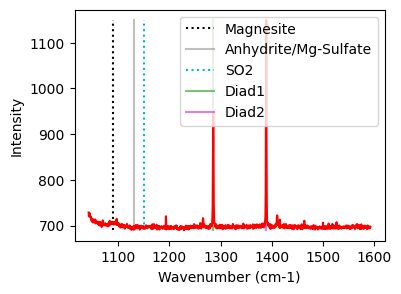

In [40]:
plot1=pf.plot_diad(path=spectra_path, filename=Diad_Files[i], filetype=spectra_filetype)

## Now lets inspect the diads and get their approximate positions
- As with generic peak, you can exclude 2 segments (e.g. around cosmic rays)
- You then specify how many peaks you want to fit on each diad. 1 means just the strong peak, 2 hotbands, and 3 for Diad2 would also fit the C13 peak if present. 
- The identify_diad_peaks then uses scipy findpeaks to identify the positions of the 2 diads, and any other peaks the user asks for. These are saved, and fed into the later functions for peak fitting. 

## Choose a model for fitting all peaks
- Option of Voigt or PseudoVoigt. We recomend PsuedoVoigt

In [41]:
model_name='PseudoVoigtModel'

## Fit Diad 1
- Tweak the parameters in the config files for each group. E.g. how many peaks (fit_peaks), the background positions, the sigma of the diad, and whether or not you want a gaussian background

In [42]:
diad_id_config=pf.diad_id_config(height=50, exclude_range1=[1308, 1309])
diad_id_config

# FG04 Standards
if batch=='Std':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240),
    upper_bck_diad1=(1315, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init


if batch=='Weak':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1250),
    upper_bck_diad1=(1300, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Medium':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240),
    upper_bck_diad1=(1315, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Strong':
    diad1_fit_config_init=pf.diad1_fit_config(
    fit_gauss=True, gauss_amp= 2*GroupN_df['HB1_abs_prom'].iloc[i],
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1220),
    upper_bck_diad1=(1330, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=1000, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
diad1_fit_config_init

diad1_fit_config(model_name='PseudoVoigtModel', fit_peaks=2, N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1250), upper_bck_diad1=(1300, 1350), fit_gauss=False, gauss_amp=1000, diad_sigma=0.6, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=250.24811635671358, HB_prom=nan, x_range_baseline=30, y_range_baseline=100, dpi=200, x_range_residual=10, return_other_params=False)

### See what these fit parameters look like for diad1

Diad1_Combofit_Cent  Diad1_Voigt_Cent  Diad1_cent_err  Diad1_Voigt_Area  \
0          1285.663611       1285.663611        0.008594        422.320344   

   Diad1_Voigt_Sigma  Diad1_Voigt_Gamma  Diad1_Combofit_Height  \
0           0.643269                  0             252.373655   

   Diad1_Residual  Diad1_Prop_Lor  Diad1_fwhm        Diad1_refit  \
0        2.887425        0.563435    1.286537  Flagged Warnings:   

   Diad1_Asym50  Diad1_Asym70  Diad1_Yuan2017_sym_factor  \
0      1.061497      1.017208                   0.079119   

   Diad1_Remigi2021_BSF   Diad1_PDF_Model  
0              0.005098  PseudoVoigtModel

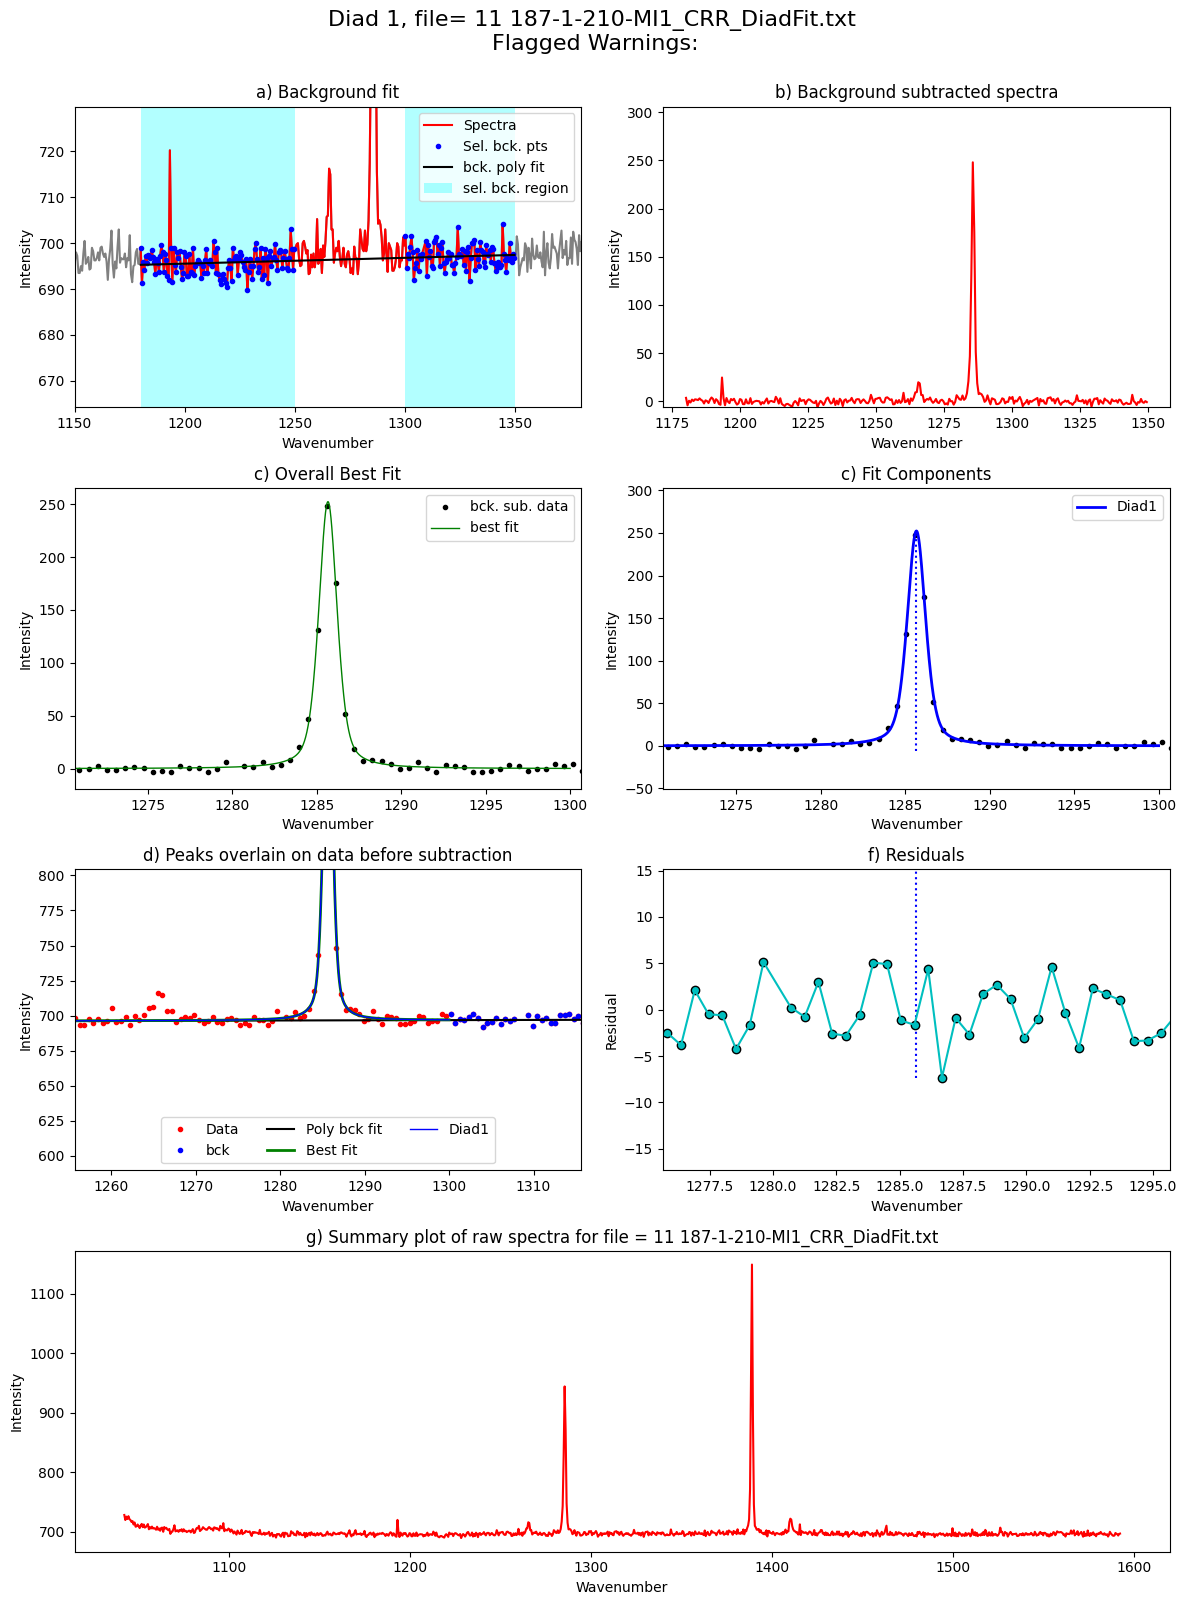

In [43]:
Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config_init,
config2=diad_id_config,
path=spectra_path, filename=Diad_Files.iloc[0],
filetype=spectra_filetype, plot_figure=True, close_figure=False,
Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
HB_pos=GroupN_df['HB1_pos'].iloc[i])
Diad1_fit

### Update the sigma
- The sigma parameter varies quite a lot based on the splitting. Best to update your first guess with what you found for the example file above

In [44]:
diad1_fit_config2=diad1_fit_config_init

## Fit diad2

In [45]:
if batch=='Std':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1350), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init


if batch=='Weak':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=2, upper_bck_diad2=(1430, 1480),
    lower_bck_diad2=(1310, 1360), diad_sigma=0.4,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Medium':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=False, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1350), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Strong':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1340), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=1000,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init
diad2_fit_config_init

diad2_fit_config(model_name='PseudoVoigtModel', fit_peaks=2, N_poly_bck_diad2=2, lower_bck_diad2=(1310, 1360), upper_bck_diad2=(1430, 1480), fit_gauss=False, gauss_amp=1000, diad_sigma=0.4, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=454.23111390174154, HB_prom=25.41934673347089, C13_prom=10, x_range_baseline=30, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=30, return_other_params=False)

### See what these fit parameters look like for diad2

Diad2_Combofit_Cent  Diad2_Voigt_Cent  Diad2_cent_err  Diad2_Voigt_Area  \
0          1388.973489       1388.973439        0.003549        635.650868   

   Diad2_Voigt_Sigma  Diad2_Voigt_Gamma     HB2_Cent   HB2_Area  HB2_Sigma  \
0           0.538871                  0  1410.413843  72.635716   0.859463   

   Diad2_Combofit_Height  Diad2_Residual  Diad2_Prop_Lor  Diad2_fwhm  \
0             458.222199        2.129767        0.536948    1.077741   

         Diad2_refit  Diad2_Asym50  Diad2_Asym70  Diad2_Yuan2017_sym_factor  \
0  Flagged Warnings:      1.127869      1.130952                    0.13781   

   Diad2_Remigi2021_BSF   Diad2_PDF_Model  
0              0.002352  PseudoVoigtModel

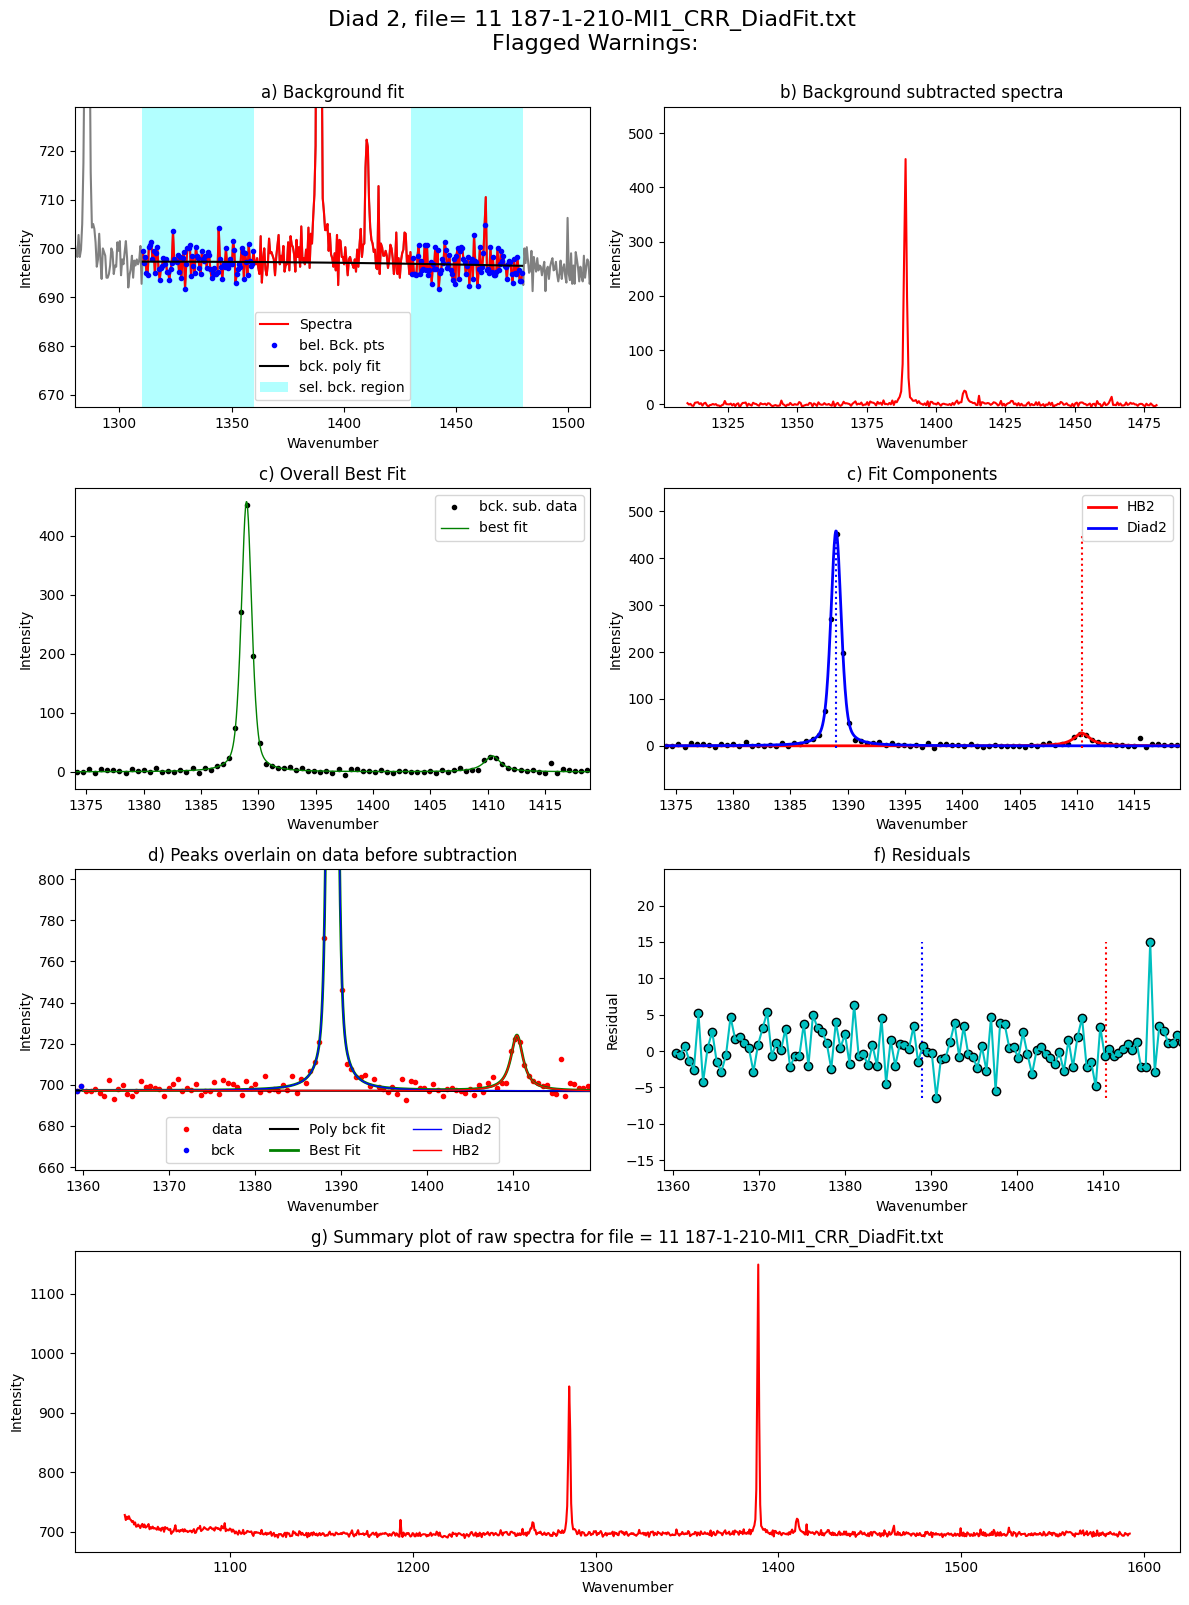

In [46]:
Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
    config2=diad_id_config,
path=spectra_path, filename=Diad_Files[i], filetype=spectra_filetype,
plot_figure=True, close_figure=False, 
Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
HB_pos=GroupN_df['HB2_pos'].iloc[i], 
C13_pos=GroupN_df['C13_pos'].iloc[i])
Diad2_fit.to_clipboard(excel=True)
Diad2_fit

## Loop over all the files in the group
- This will loop over all the 

  0%|          | 0/13 [00:00<?, ?it/s]

Processing file: 11 187-1-210-MI1_CRR_DiadFit.txt


  8%|▊         | 1/13 [00:02<00:27,  2.30s/it]

Processing file: 13 187-1-210-MI2-rep2.txt


 15%|█▌        | 2/13 [00:04<00:22,  2.09s/it]

Processing file: 19 187-1-211-MI2-46mw_CRR_DiadFit.txt


 23%|██▎       | 3/13 [00:06<00:23,  2.30s/it]

Processing file: 20 187-1-211-MI2-12mw.txt


 31%|███       | 4/13 [00:08<00:18,  2.10s/it]

Processing file: 21 187-1-211-MI2.txt


 38%|███▊      | 5/13 [00:10<00:16,  2.07s/it]

Processing file: 26 187-1-211-FI2.txt


 46%|████▌     | 6/13 [00:12<00:14,  2.10s/it]

Processing file: 27 187-1-211-FI3_CRR_DiadFit.txt


 54%|█████▍    | 7/13 [00:15<00:13,  2.18s/it]

Processing file: 28 187-1-211-FI1_CRR_DiadFit.txt


 62%|██████▏   | 8/13 [00:17<00:10,  2.19s/it]

Processing file: 35 187-1-213-FIC-49mw-weak_CRR_DiadFit.txt


 69%|██████▉   | 9/13 [00:19<00:08,  2.09s/it]

Processing file: 36 187-1-213-FIC.txt
below your threshold intensity, we have filled with nans


 77%|███████▋  | 10/13 [00:21<00:06,  2.06s/it]c:\users\charl\documents\python dev\diadfit\src\DiadFit\diads.py:3218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,axes=plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(12, 16))


Processing file: 39 187-9-201-MIA.txt


 85%|████████▍ | 11/13 [00:23<00:04,  2.01s/it]

Processing file: 46 187-9-202-MID-49mw-weak.txt


 92%|█████████▏| 12/13 [00:25<00:02,  2.08s/it]

Processing file: 48 187-9-202-MIE-49mw-weak.txt


100%|██████████| 13/13 [00:27<00:00,  2.09s/it]


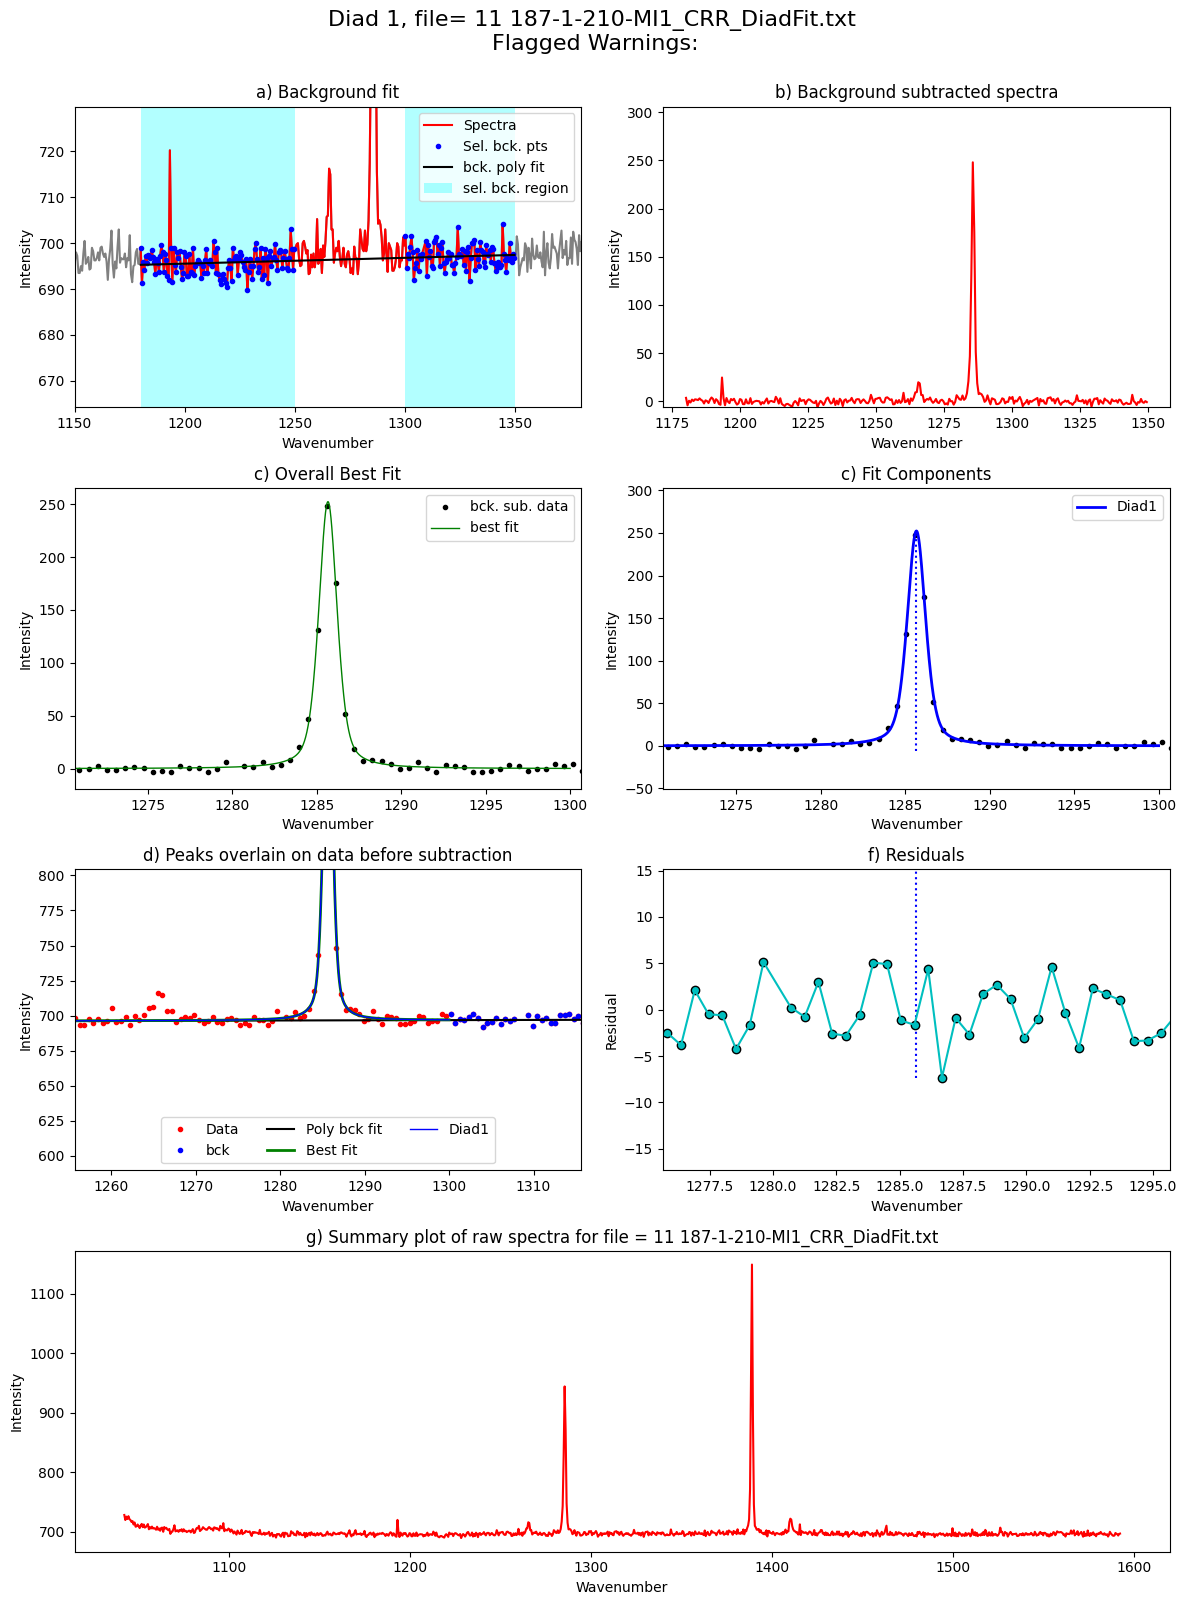

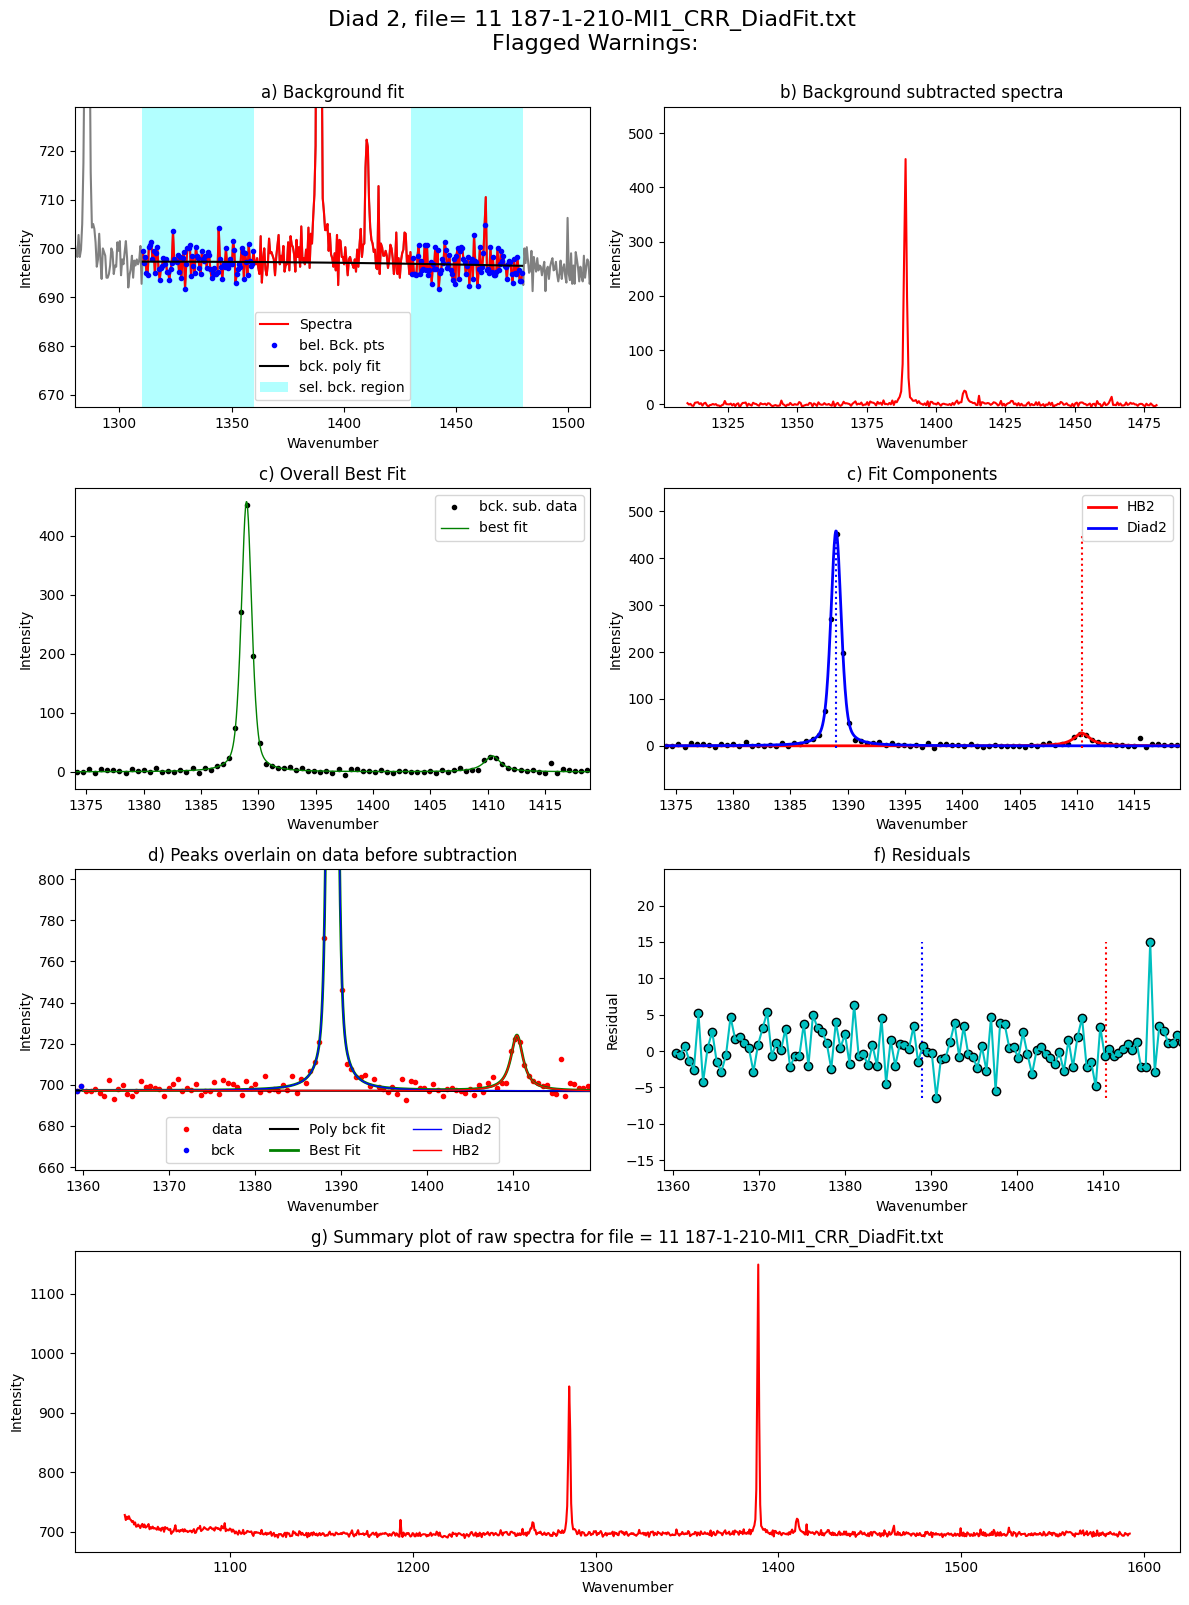

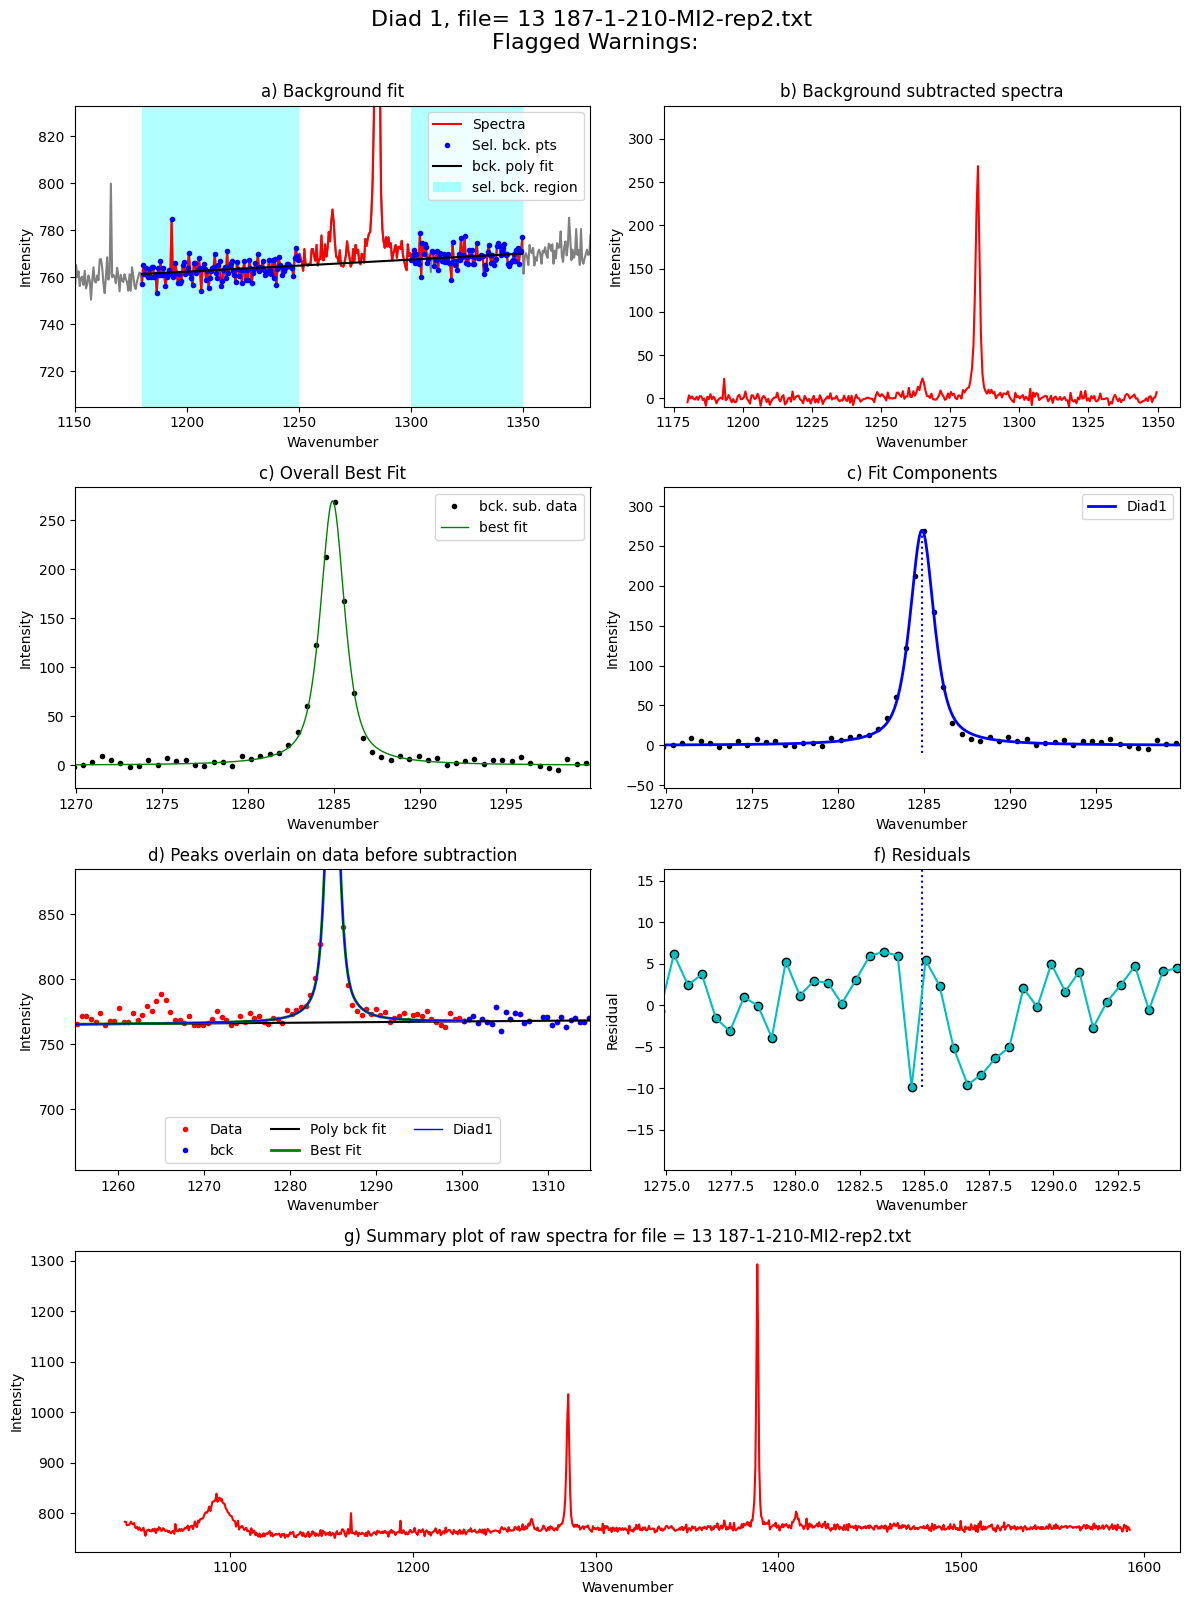

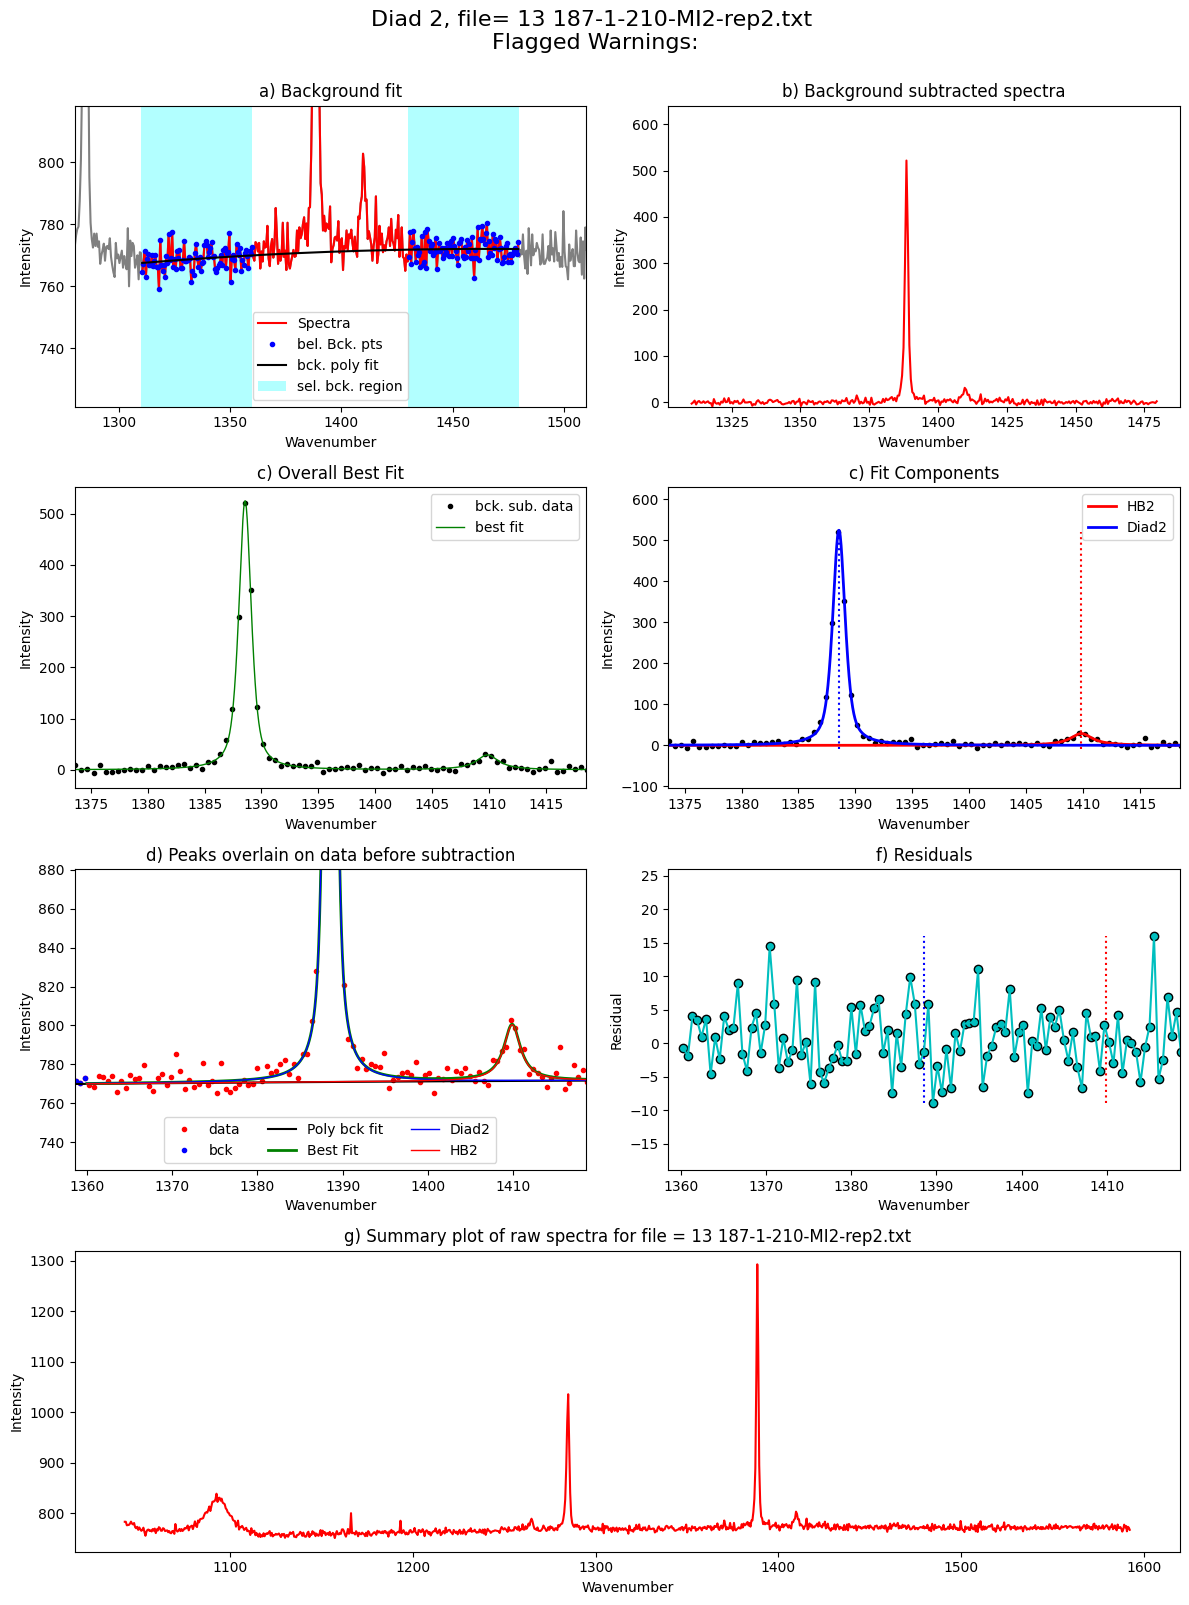

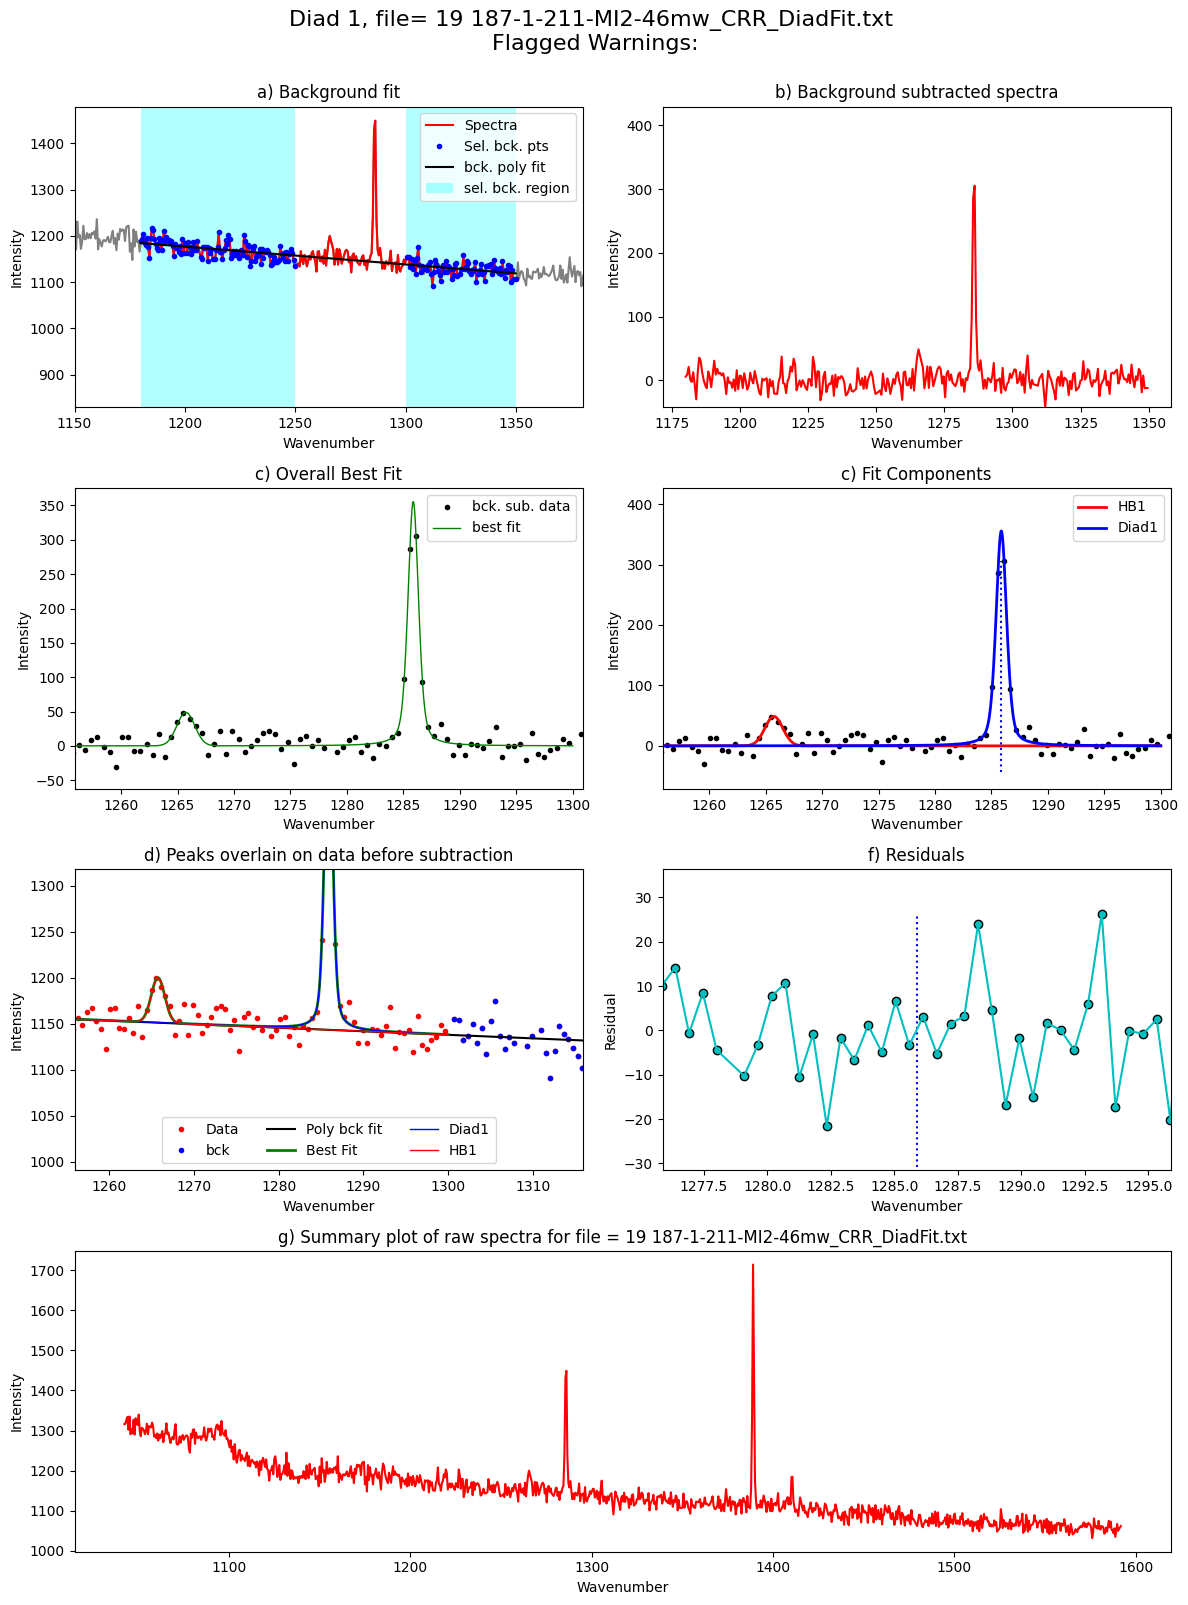

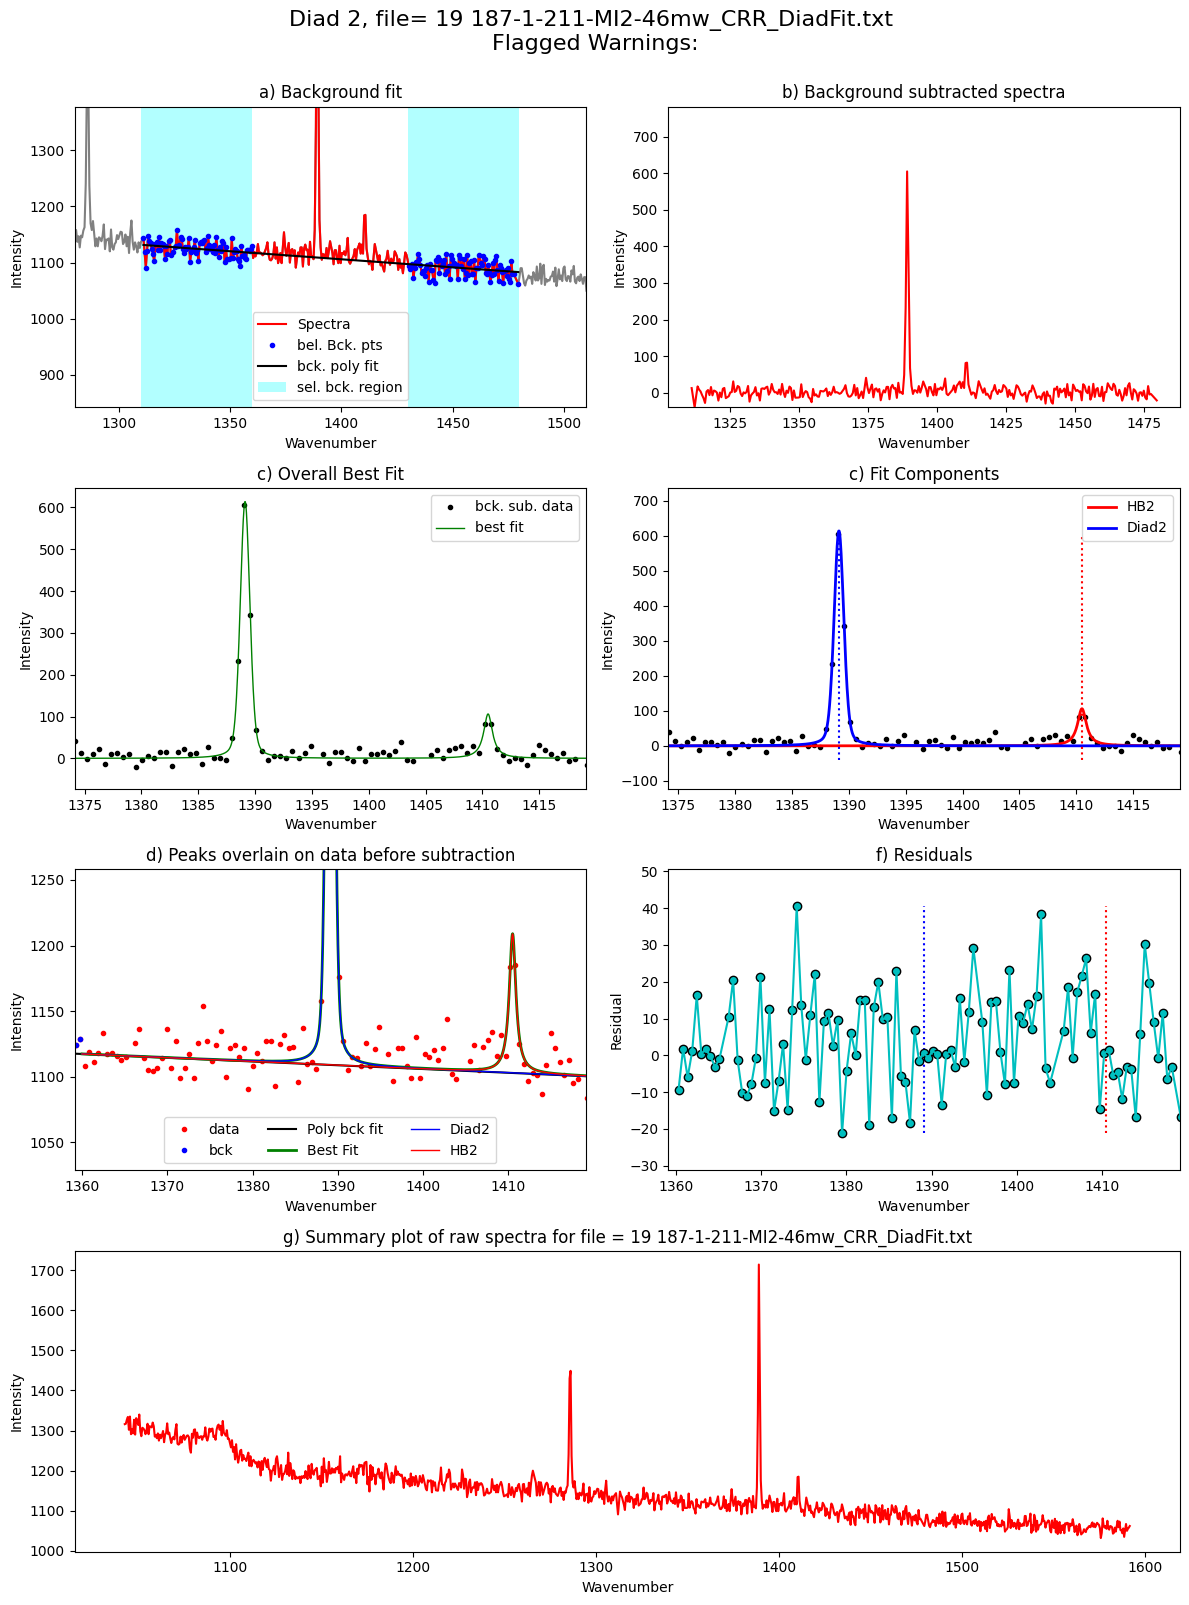

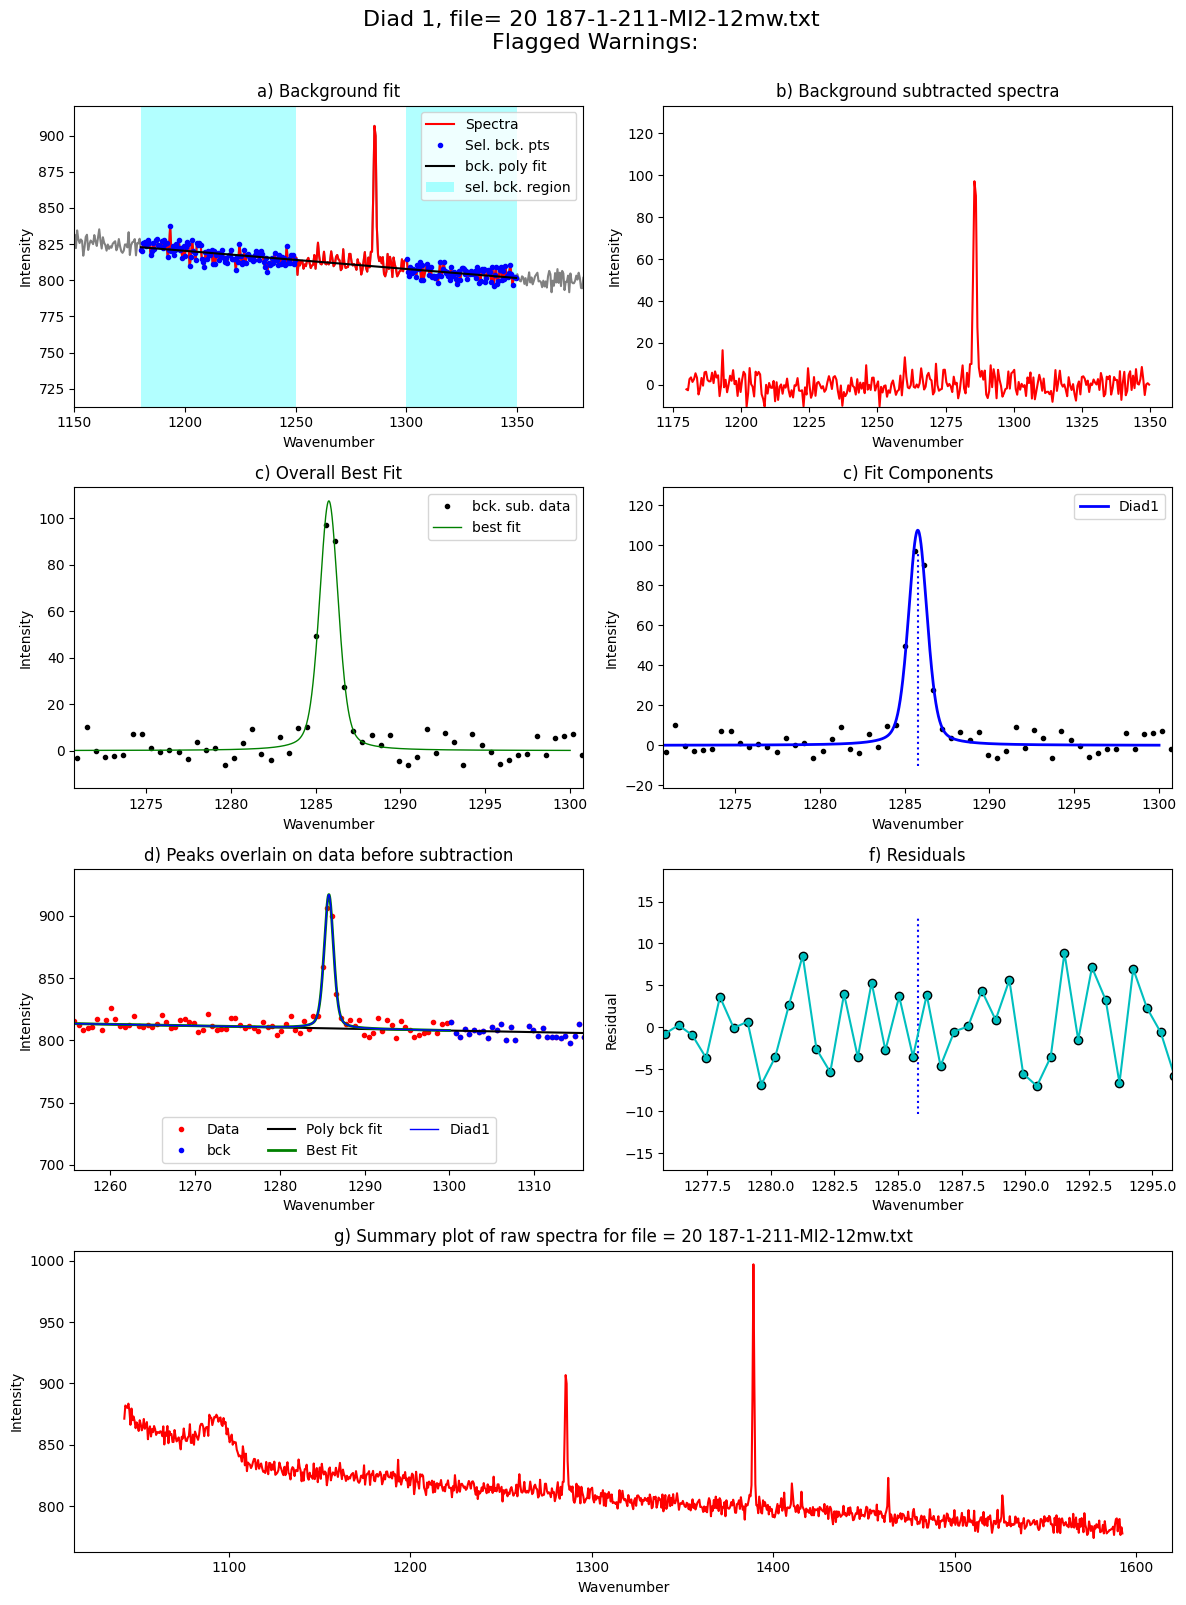

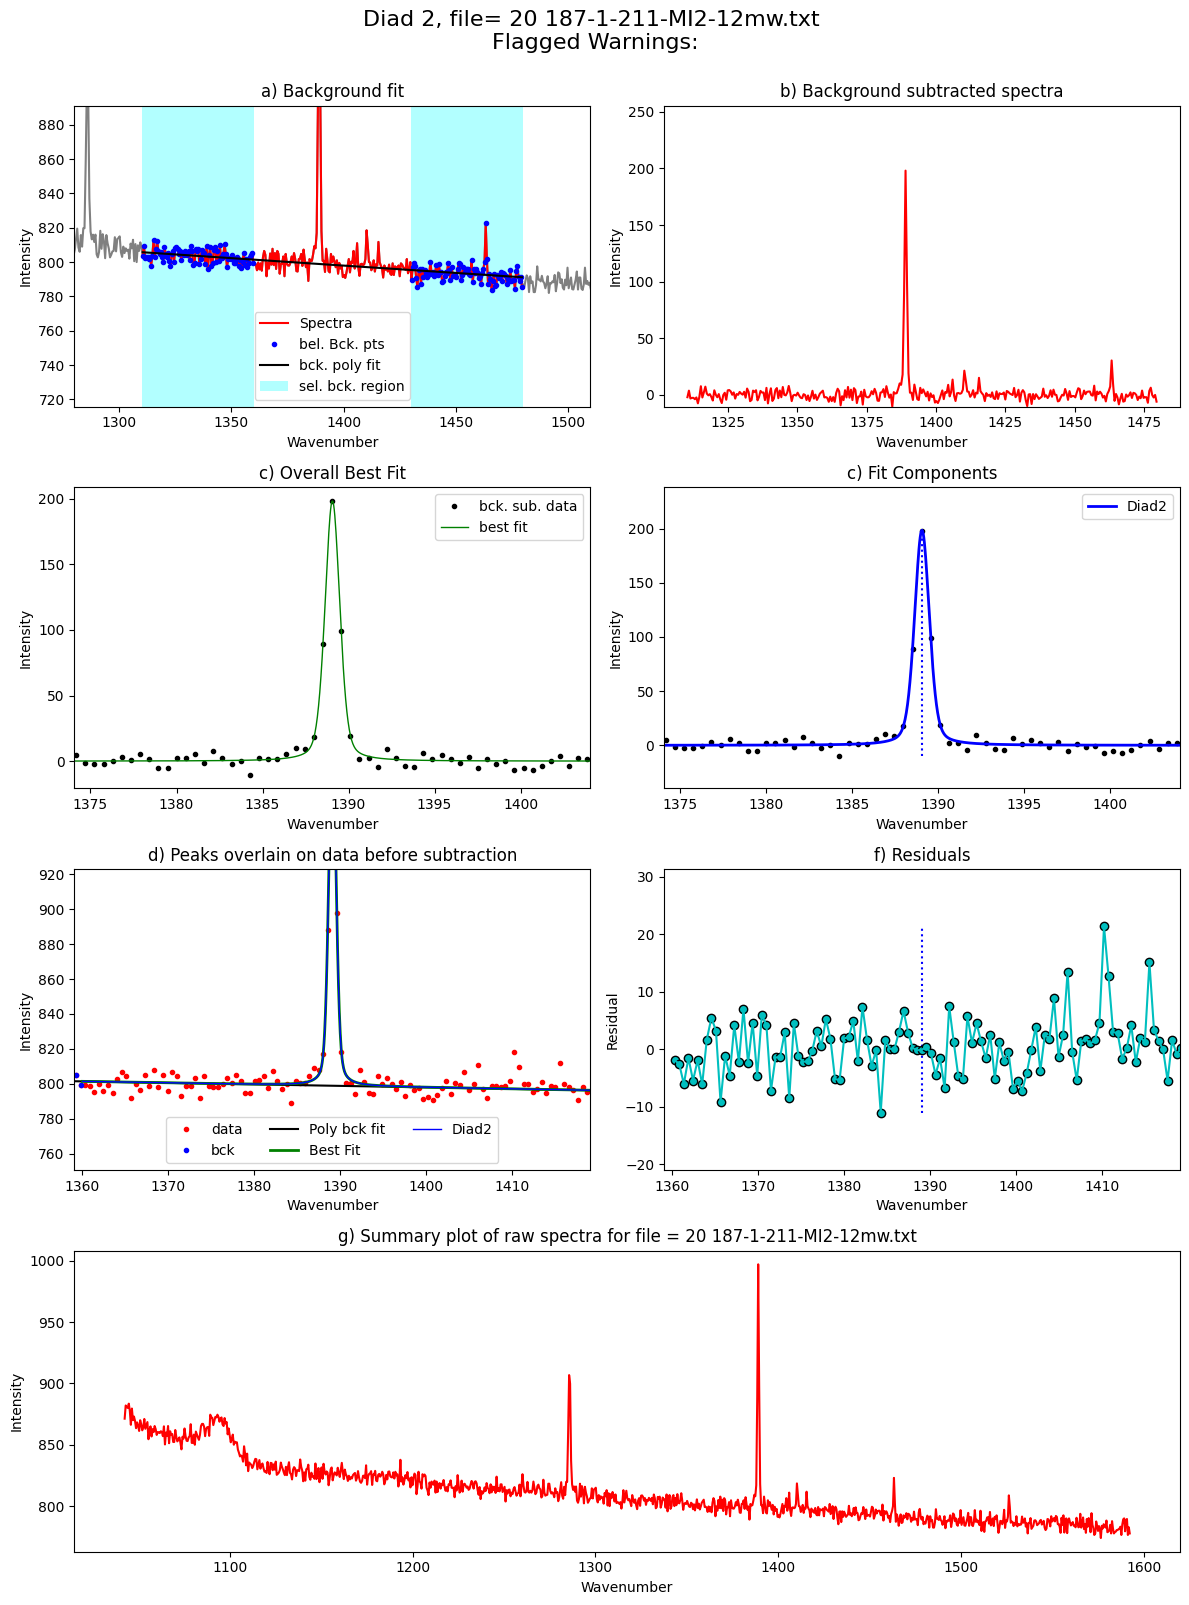

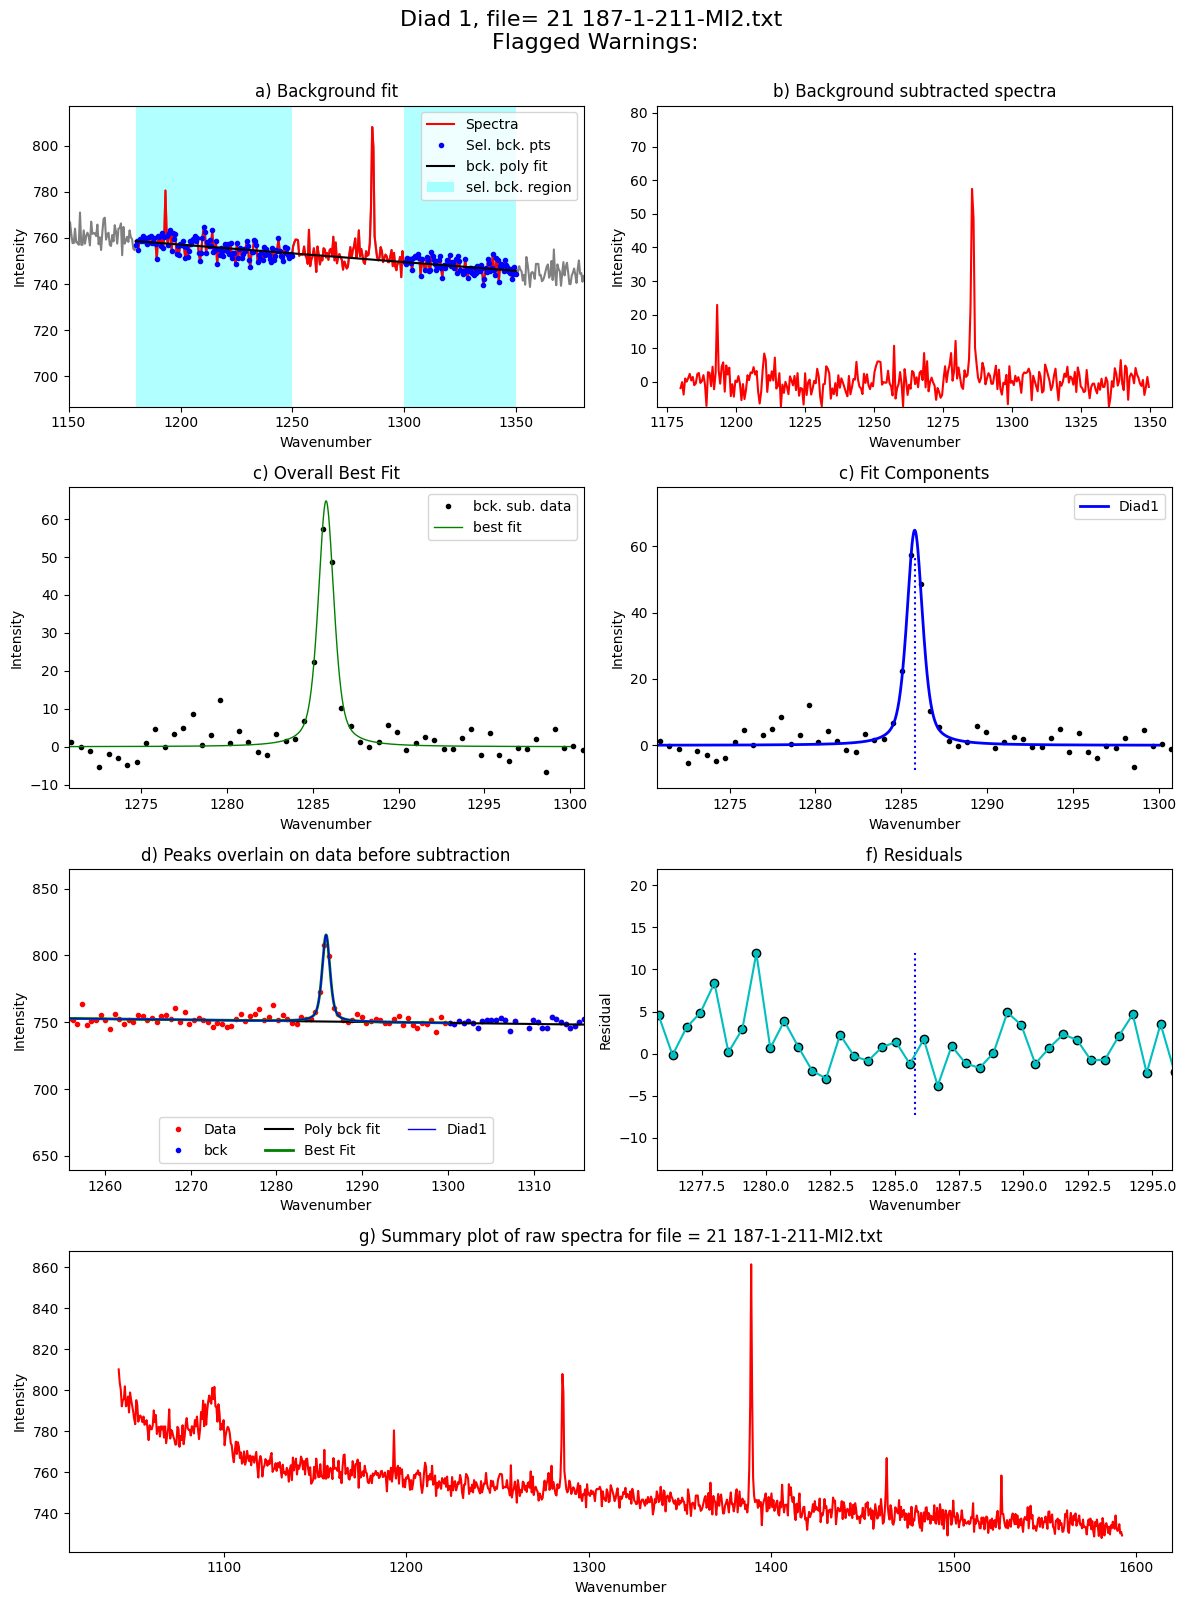

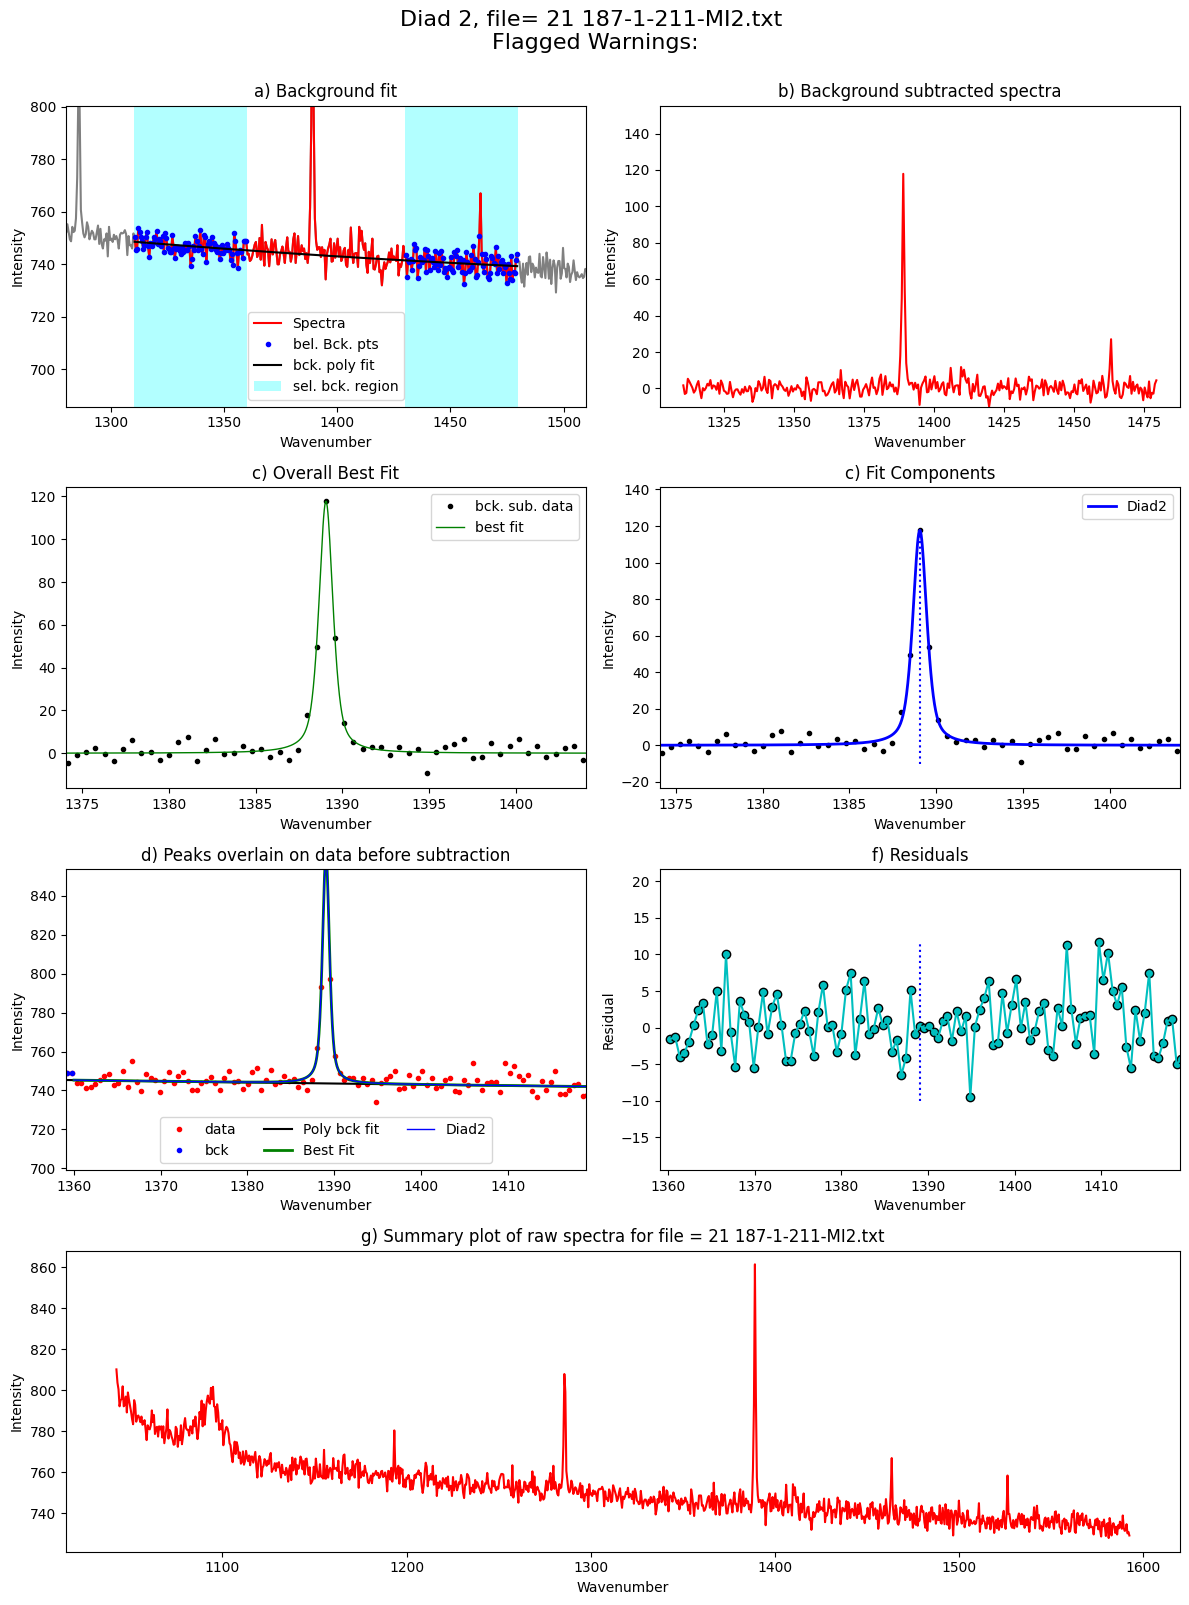

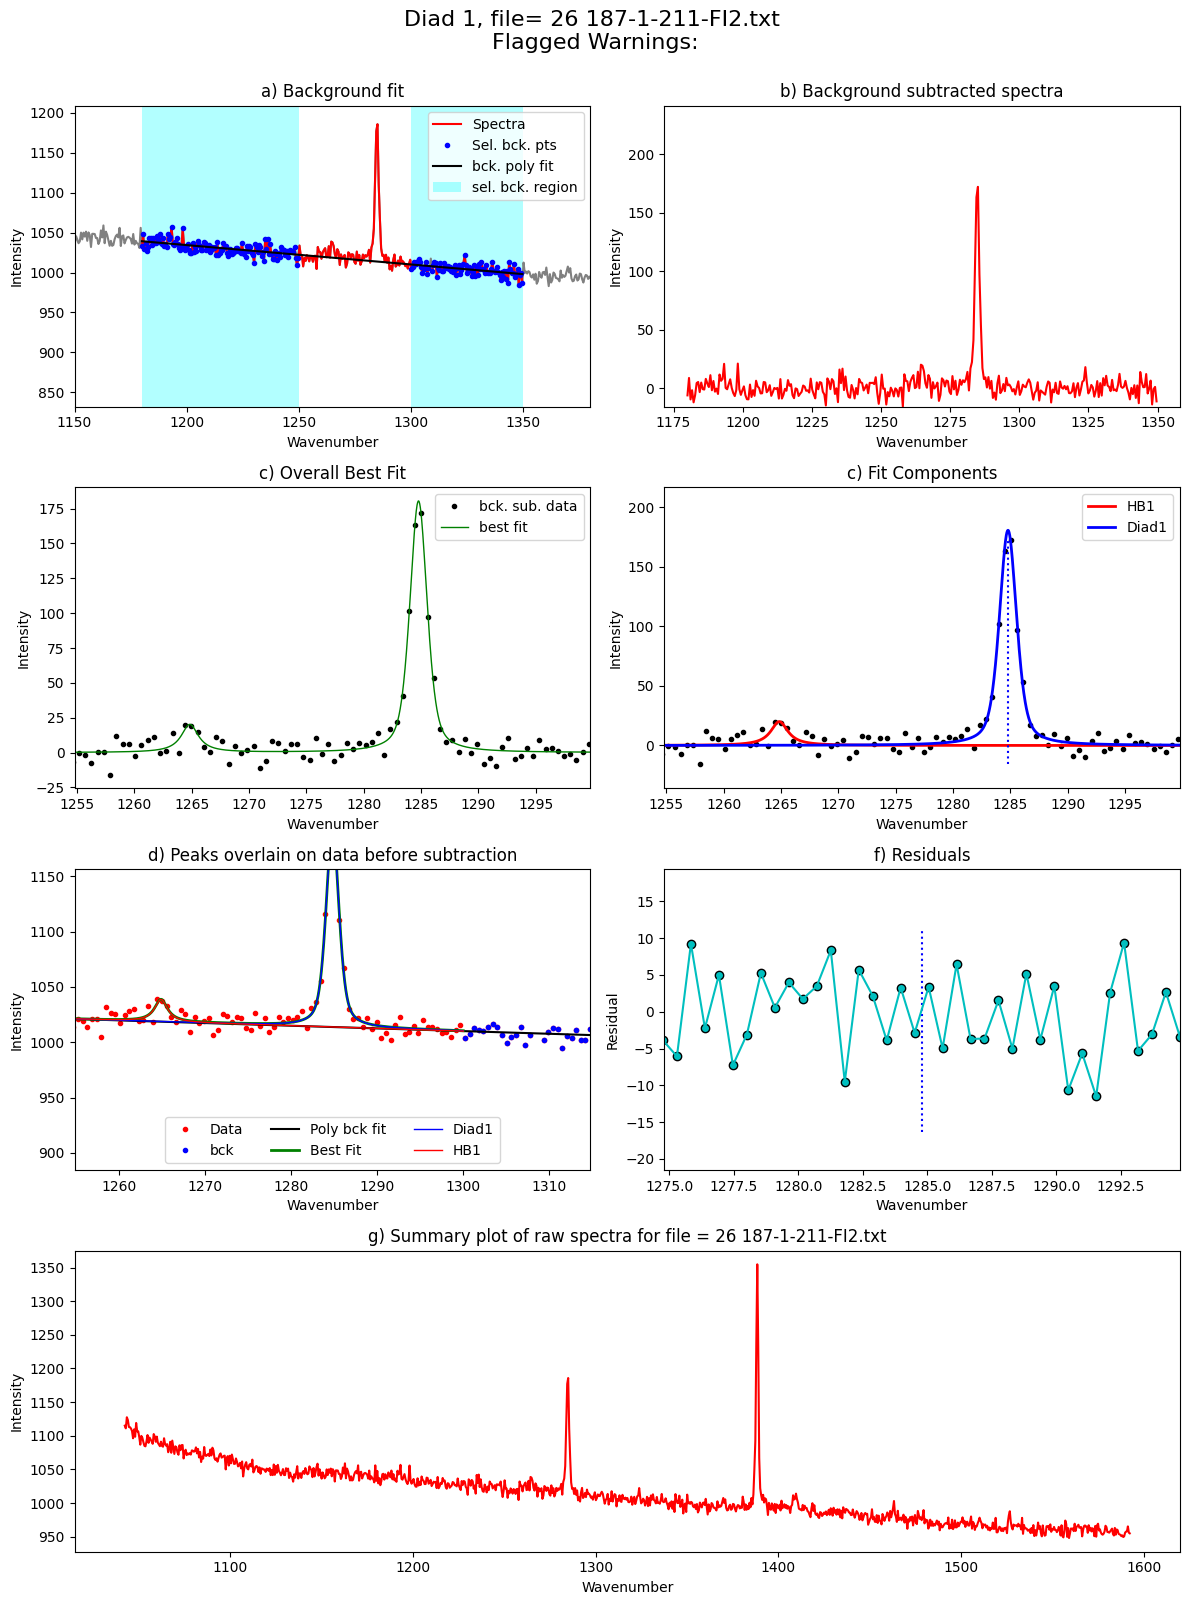

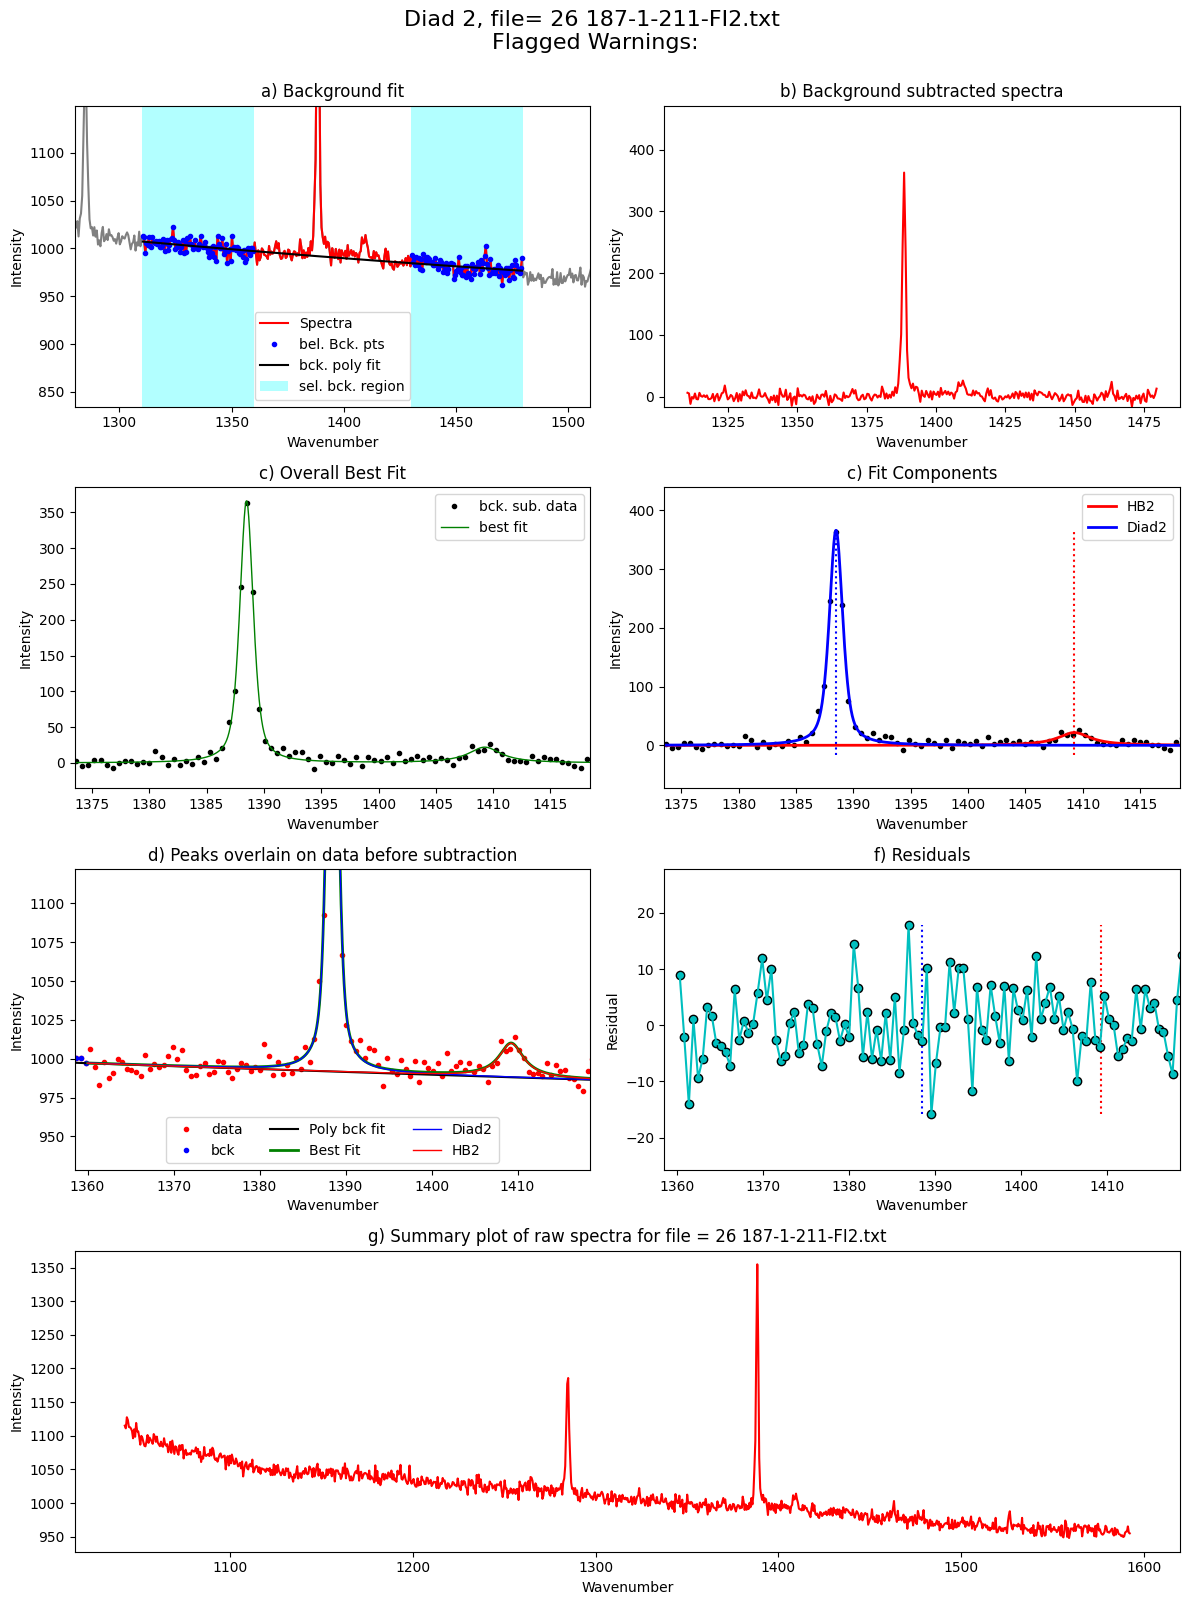

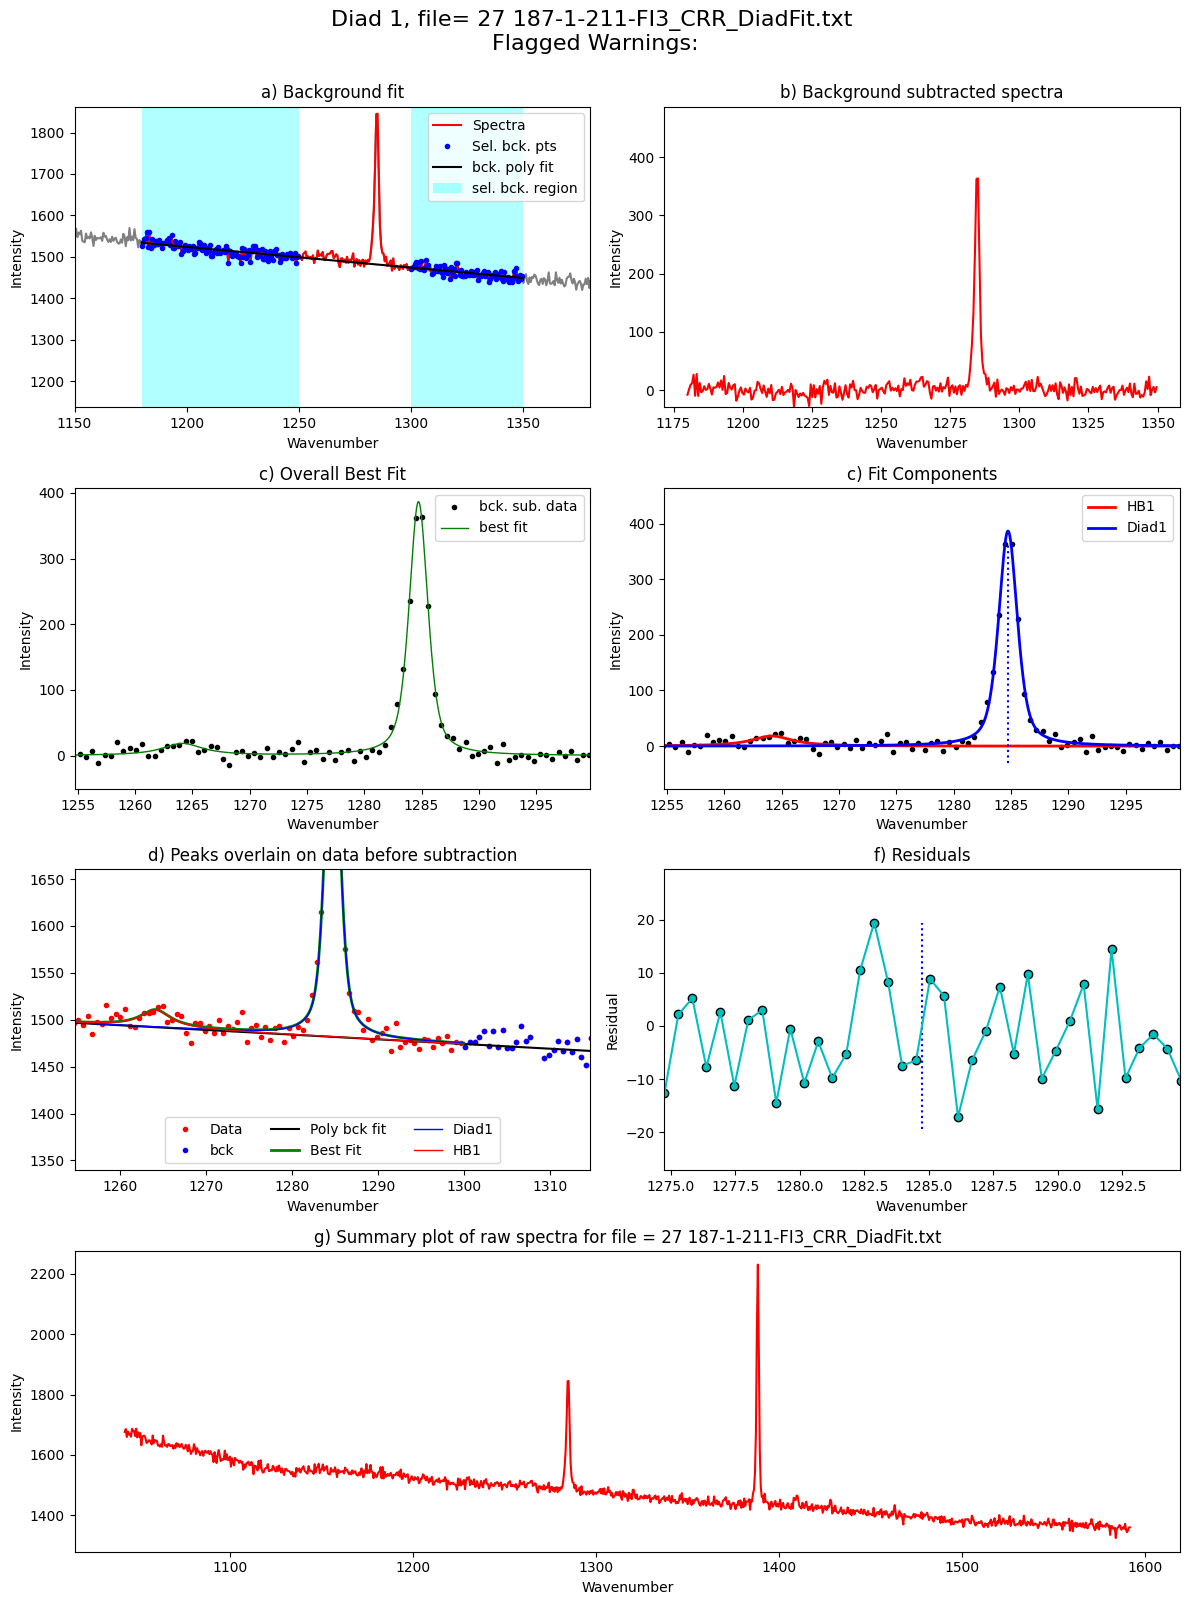

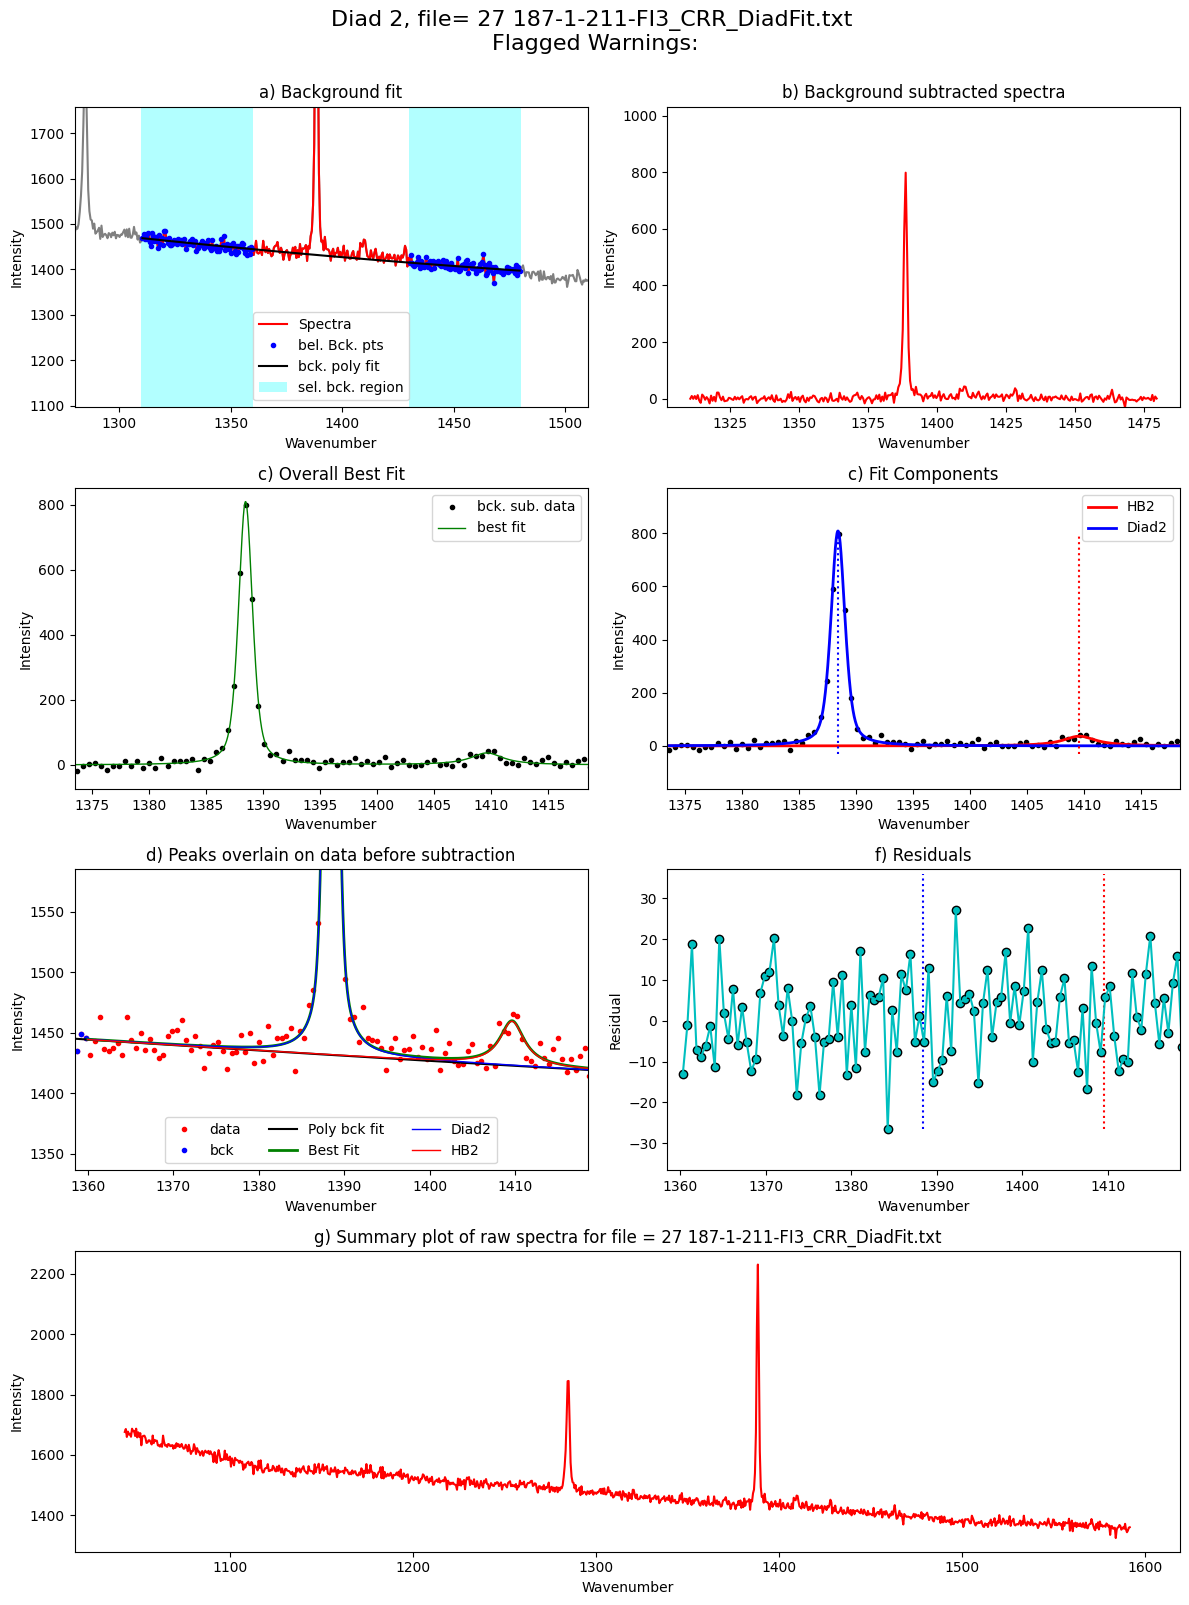

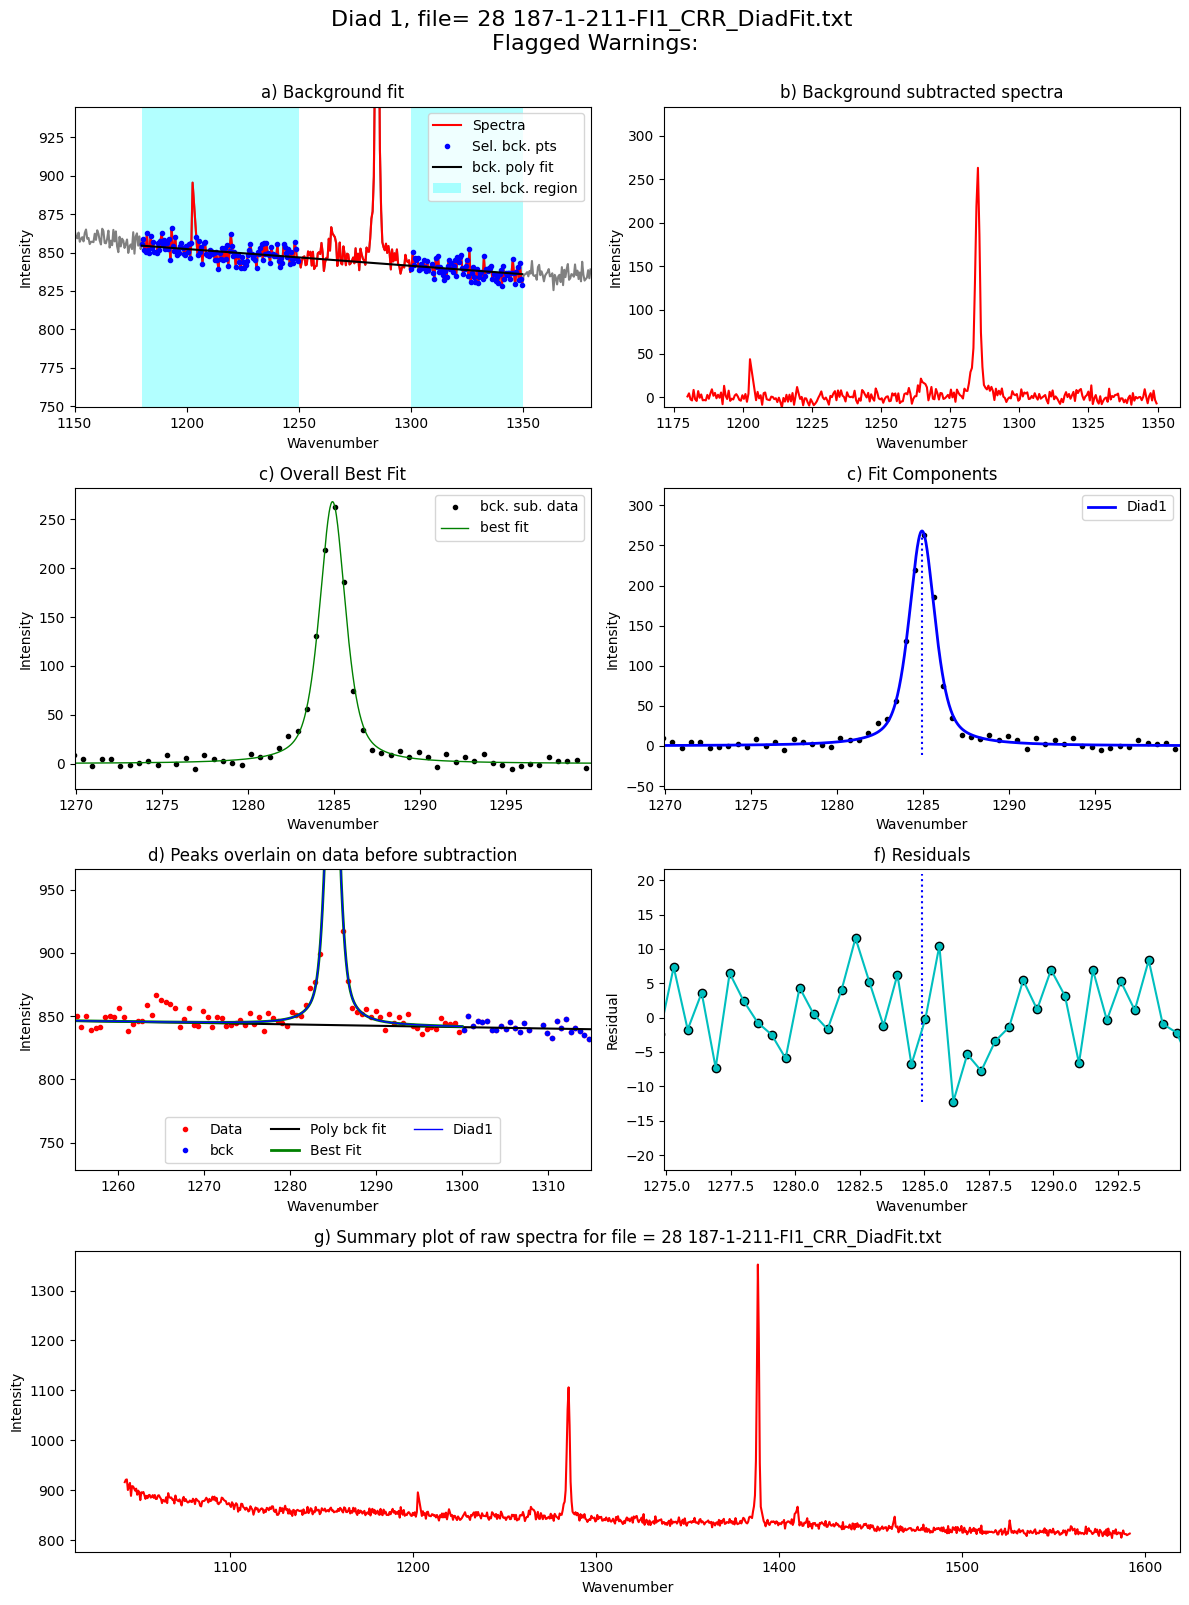

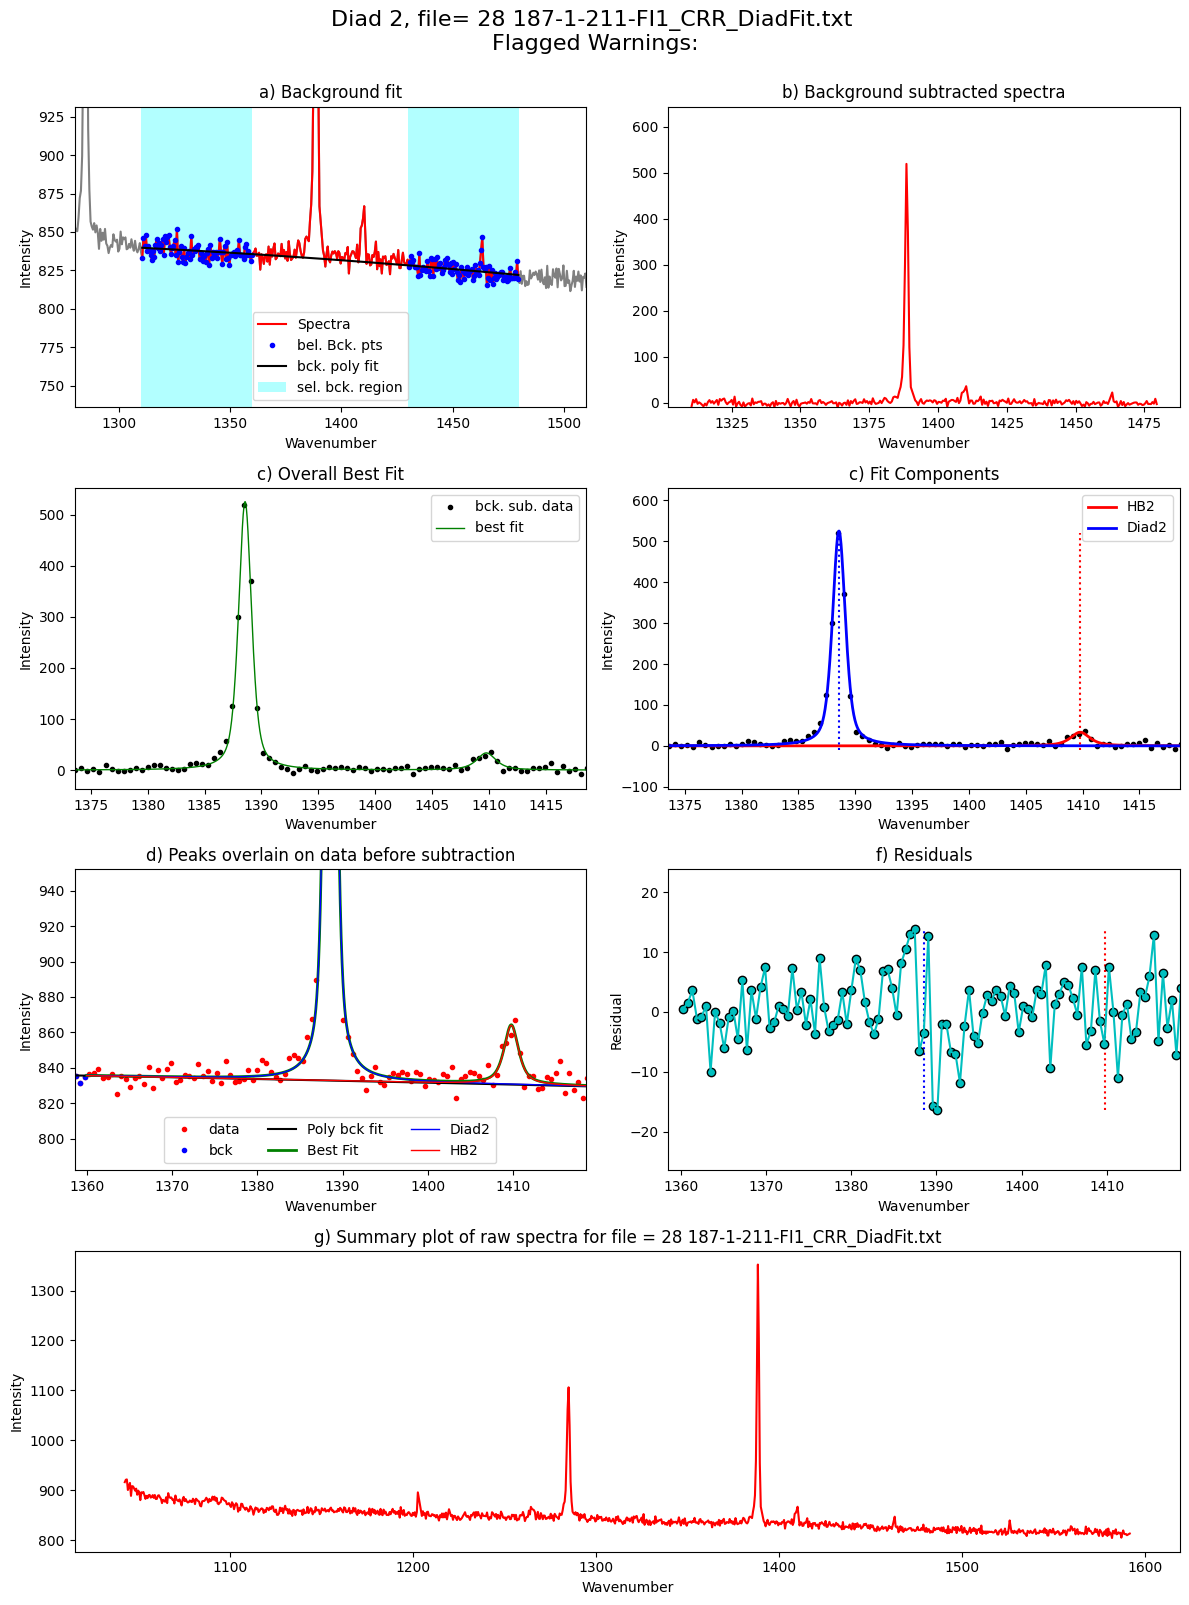

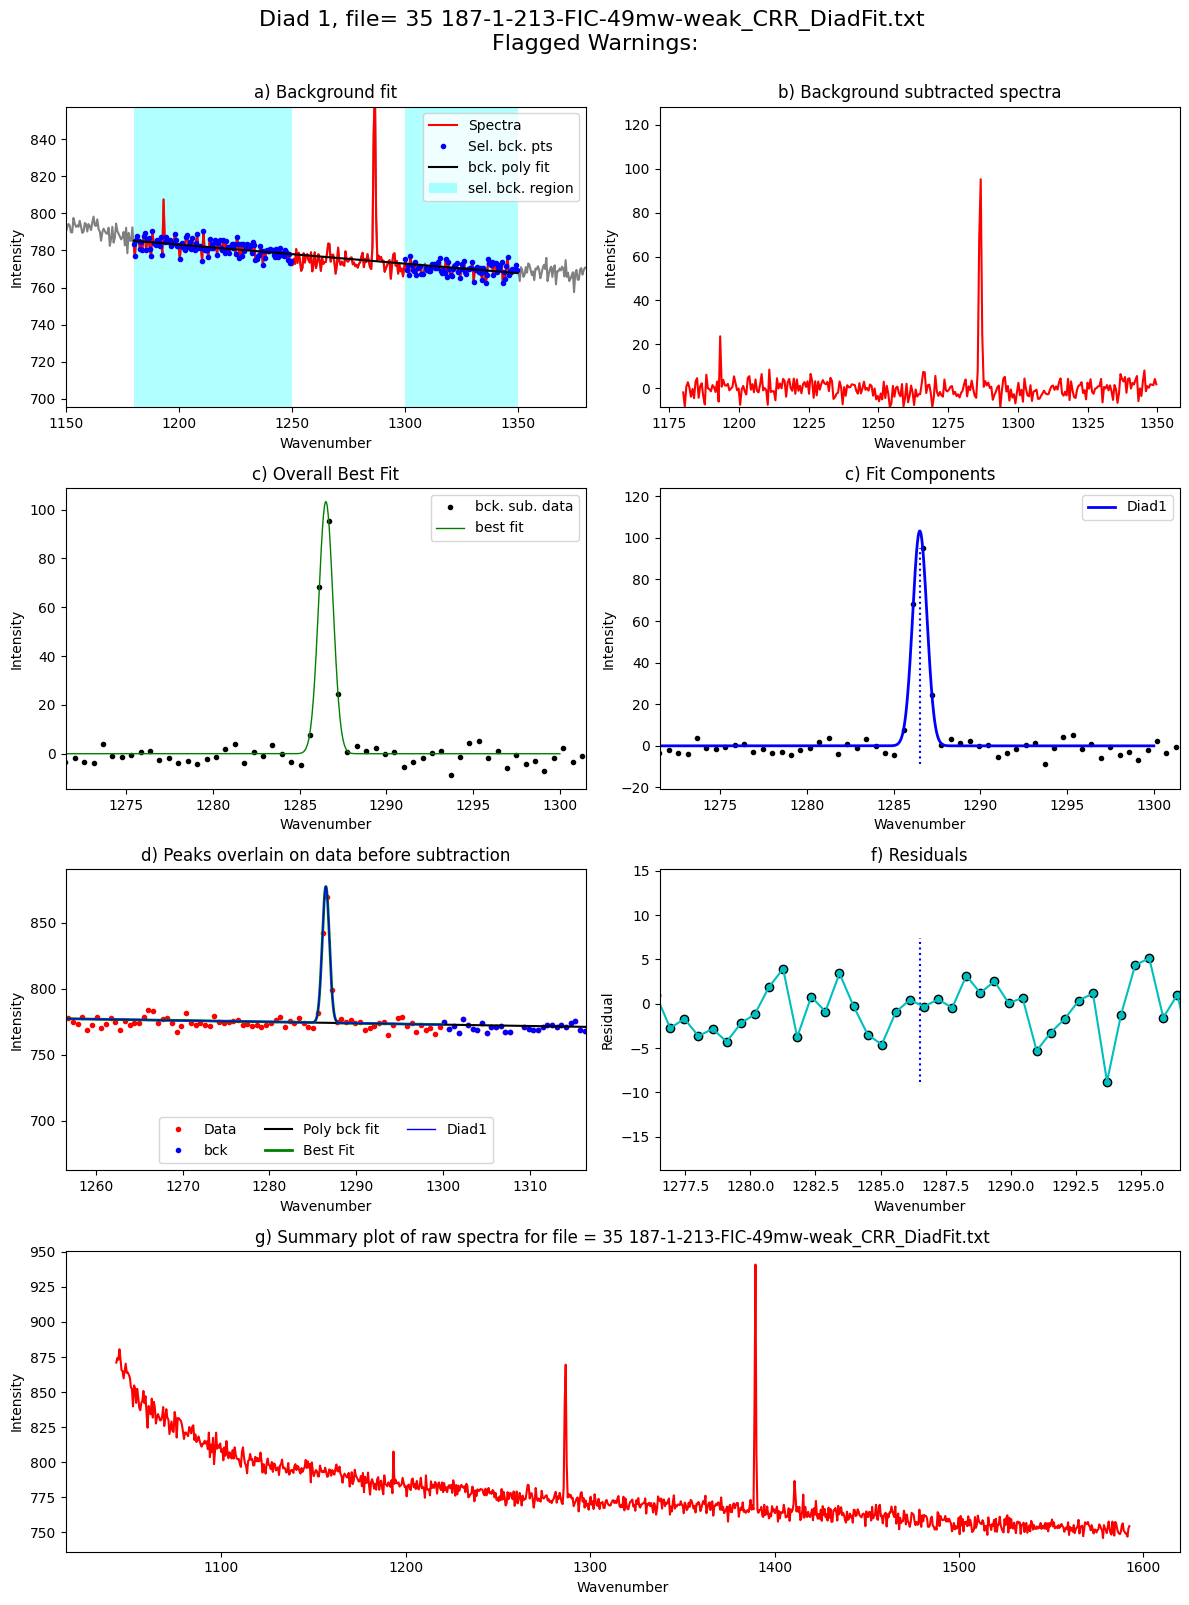

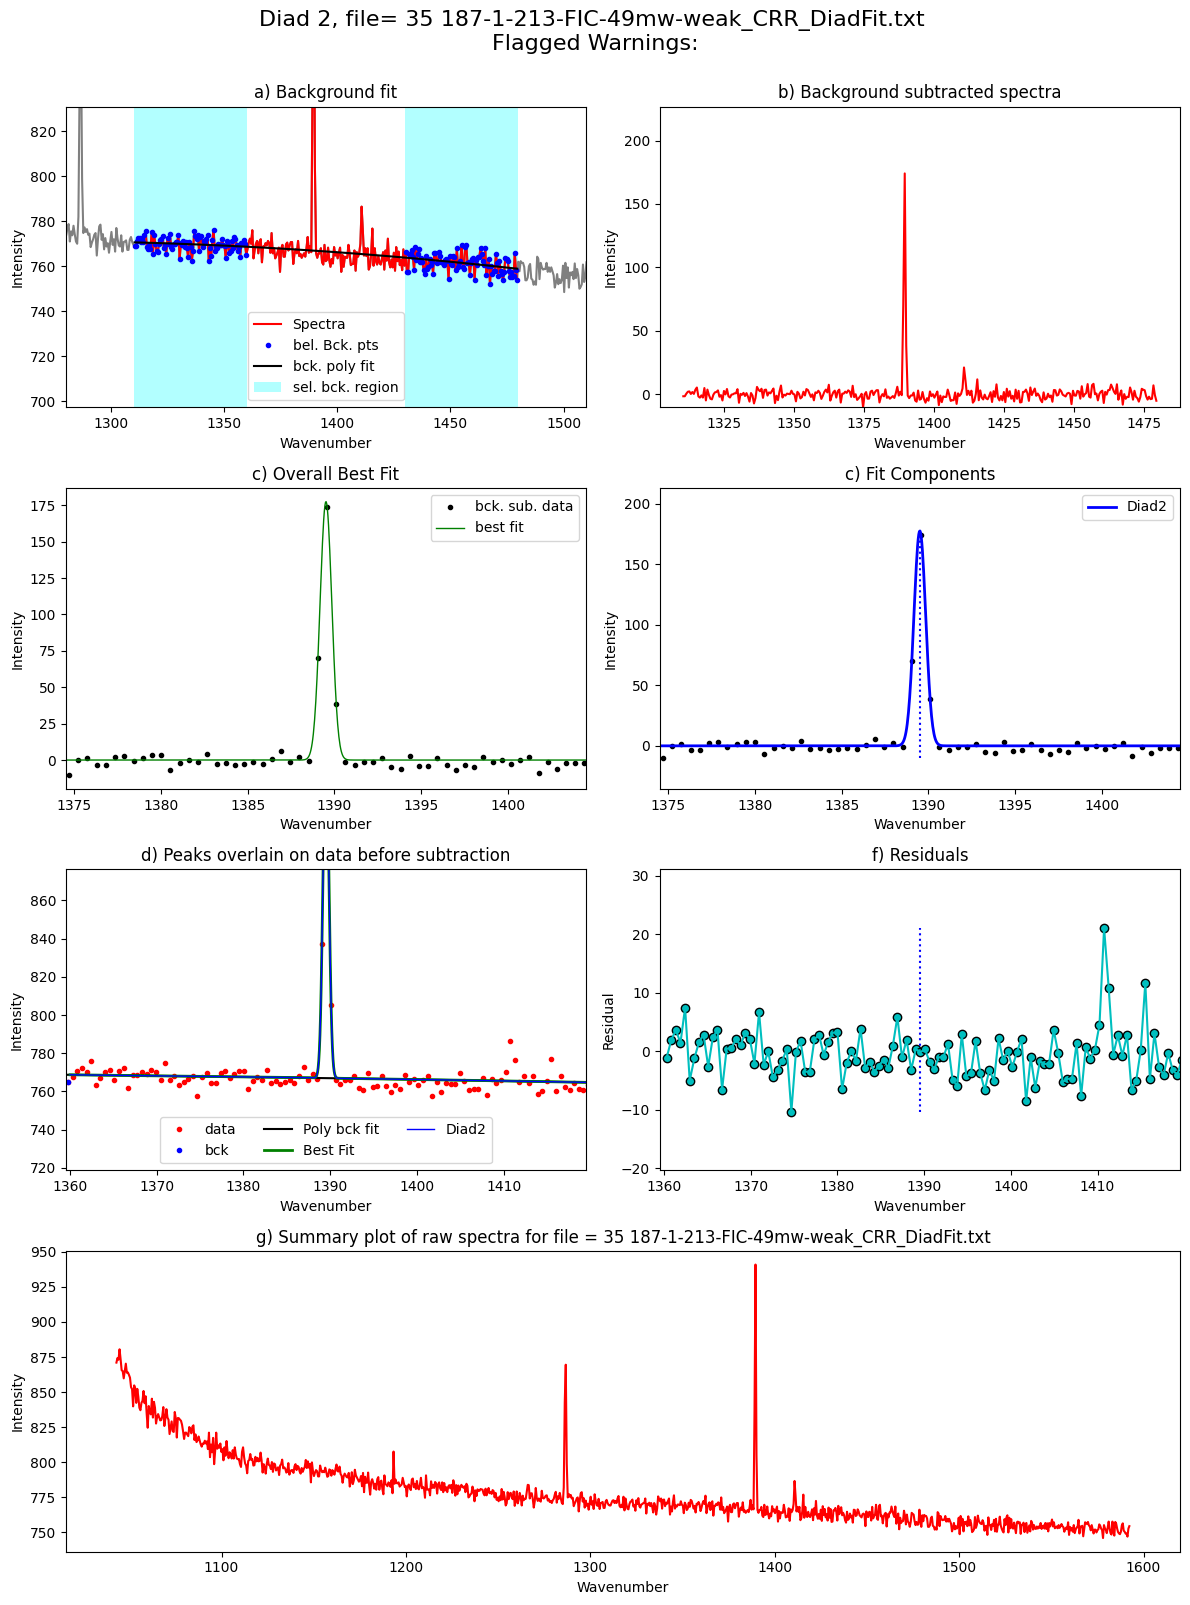

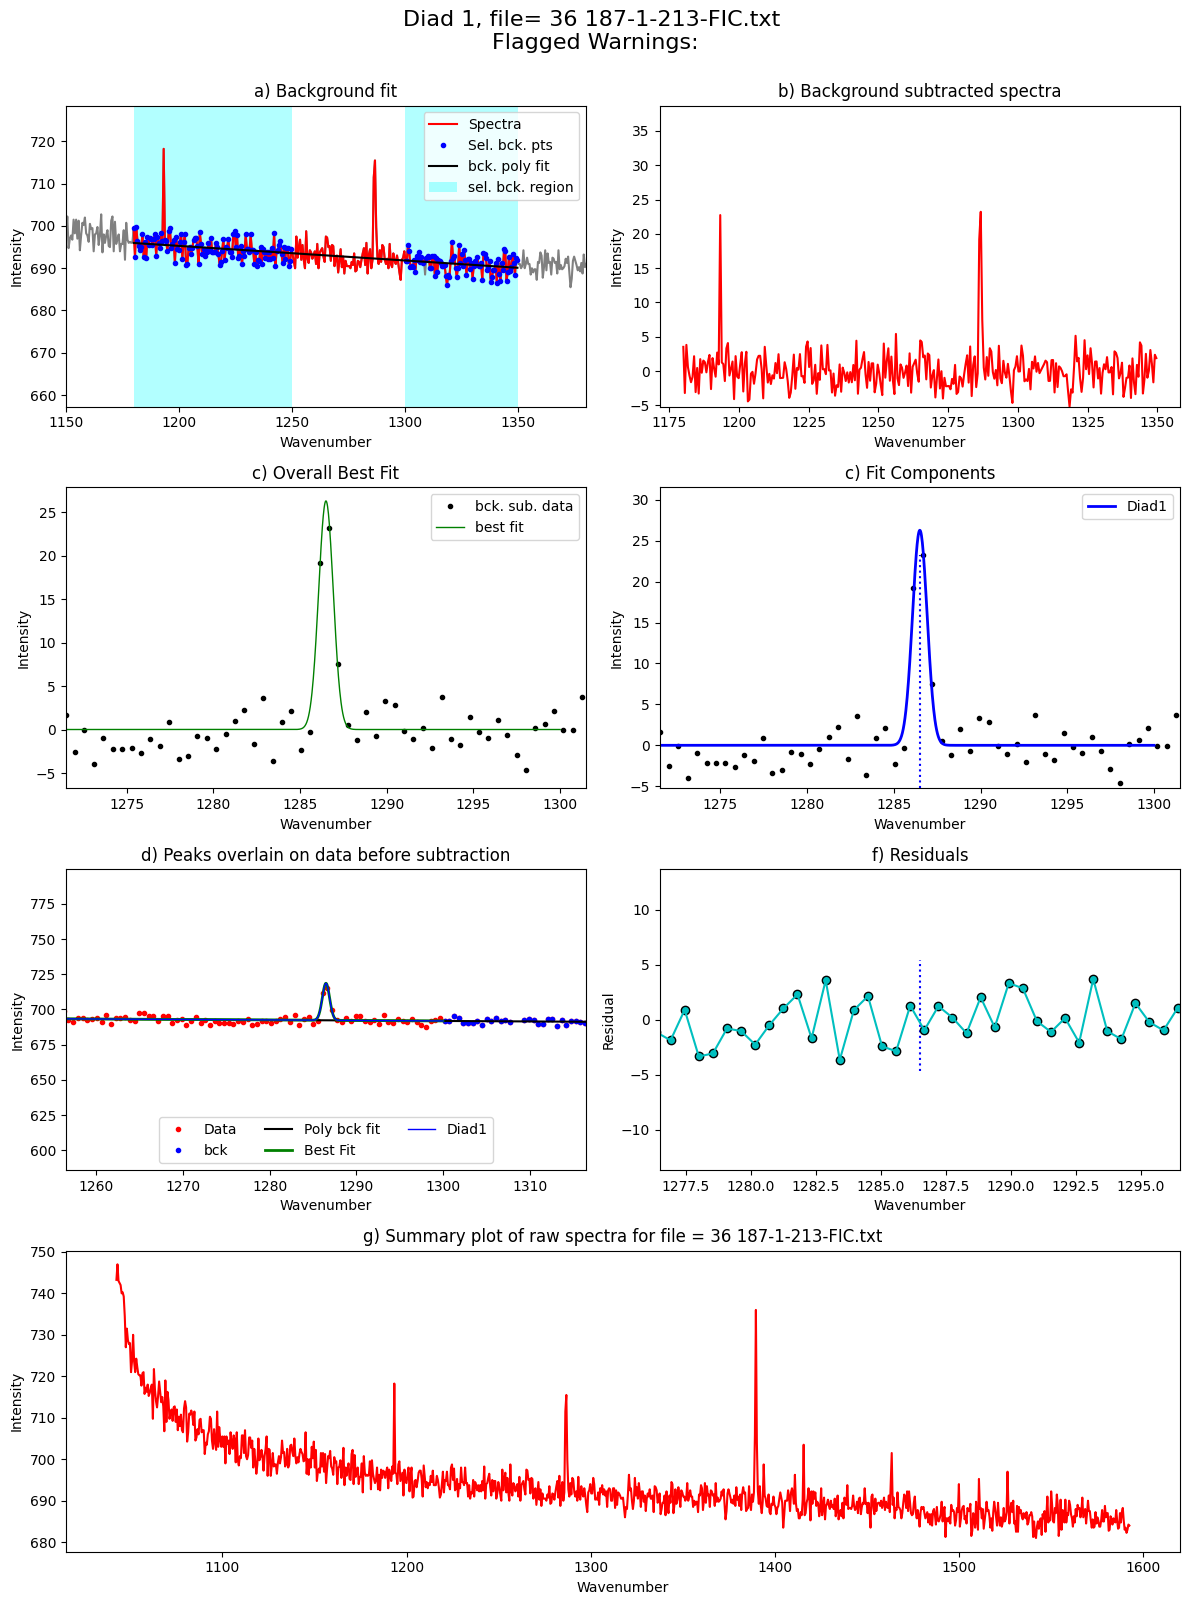

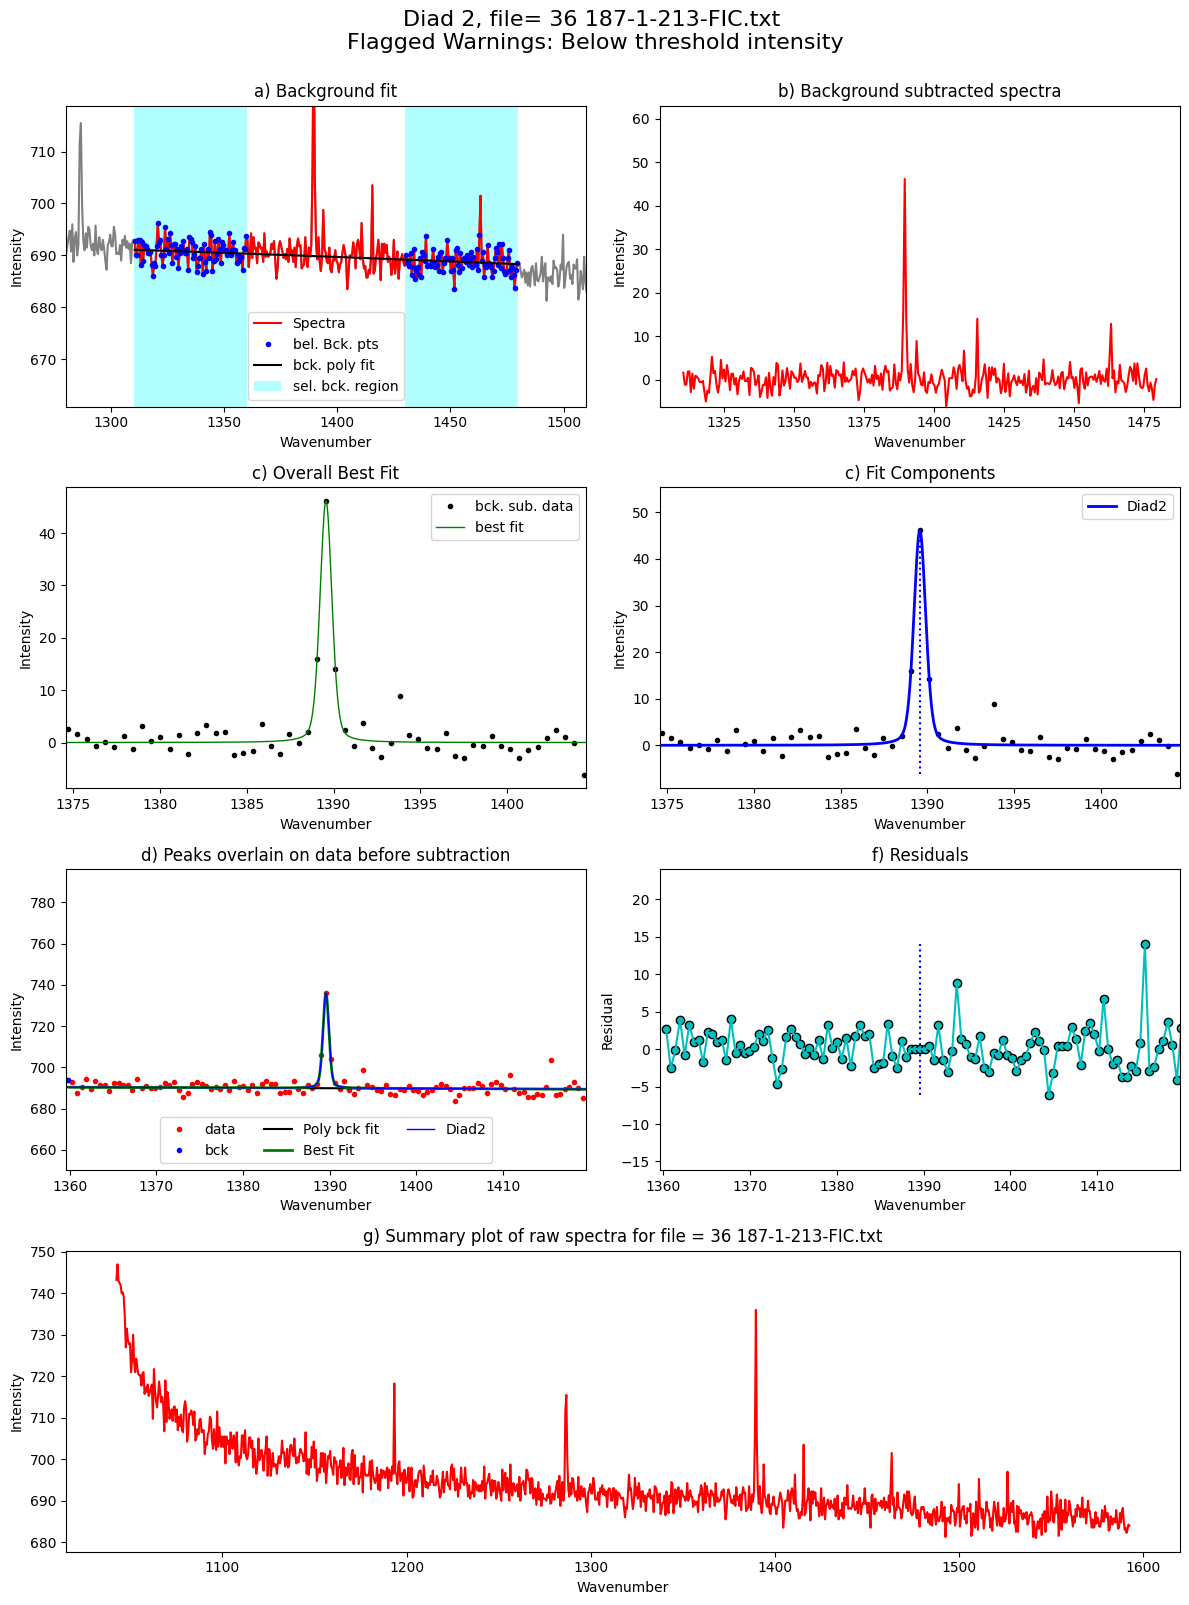

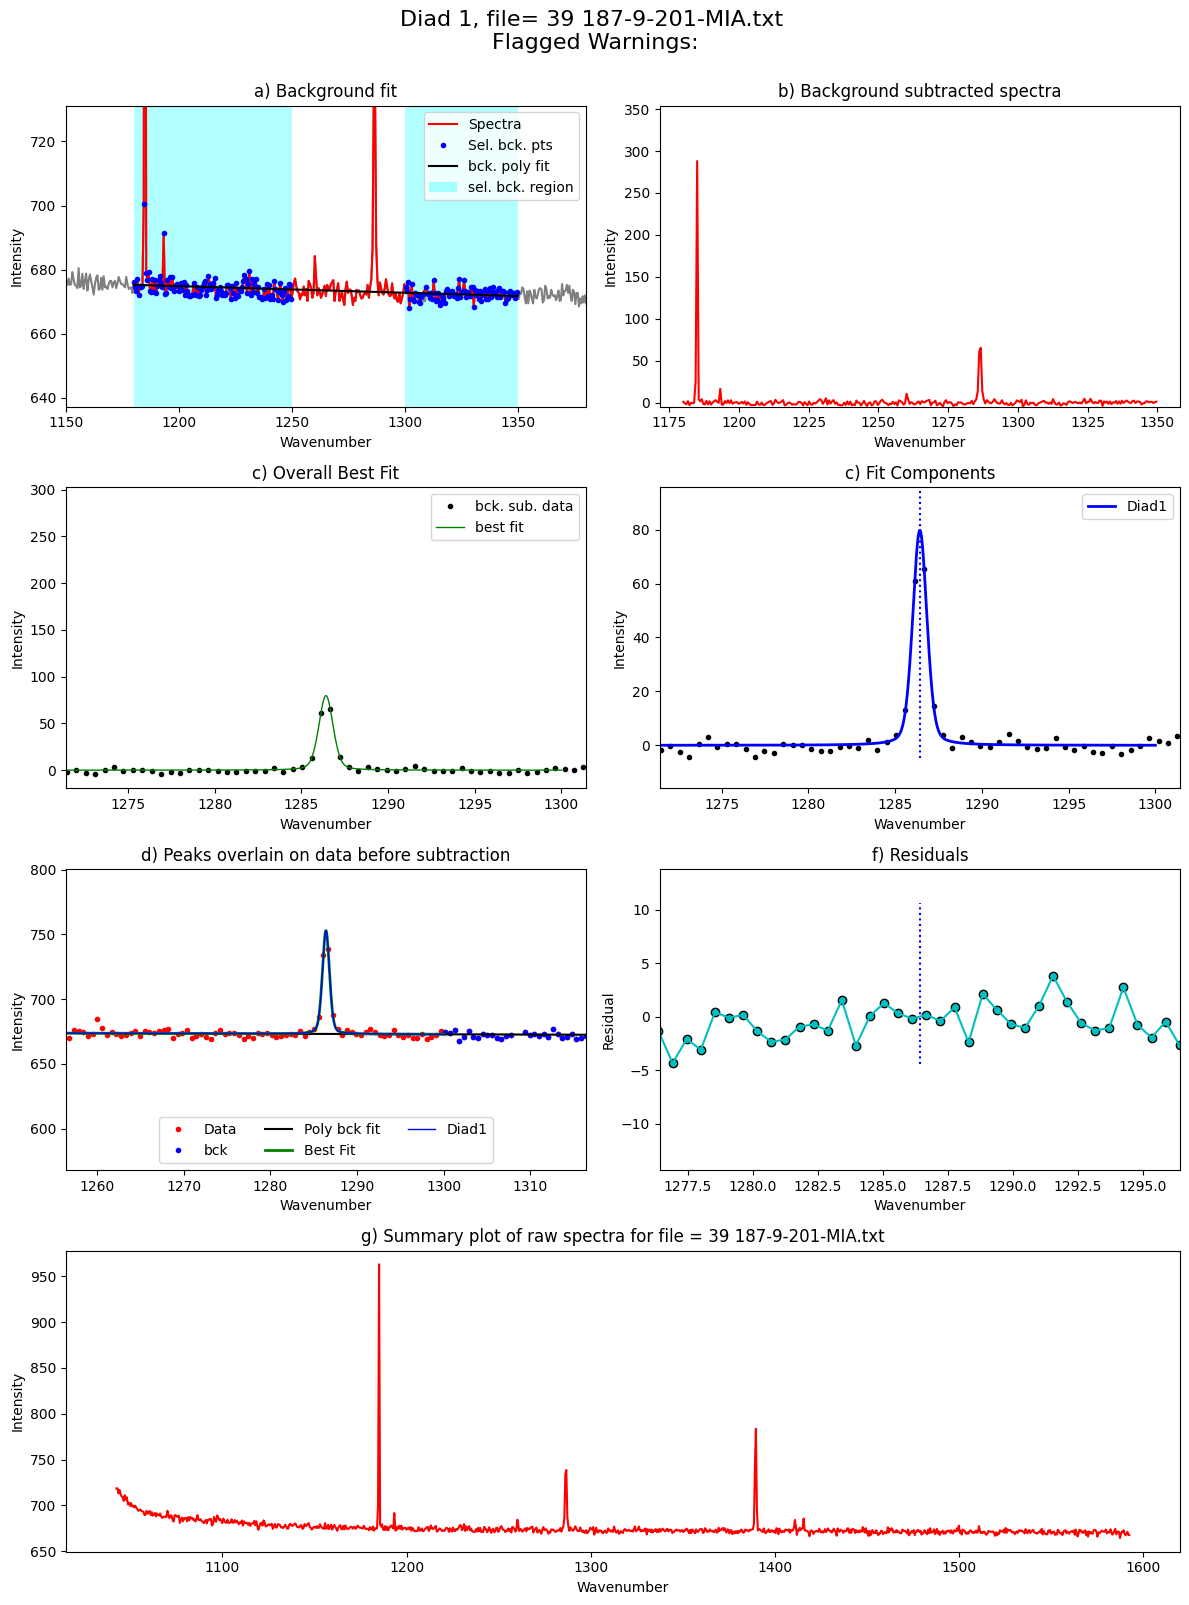

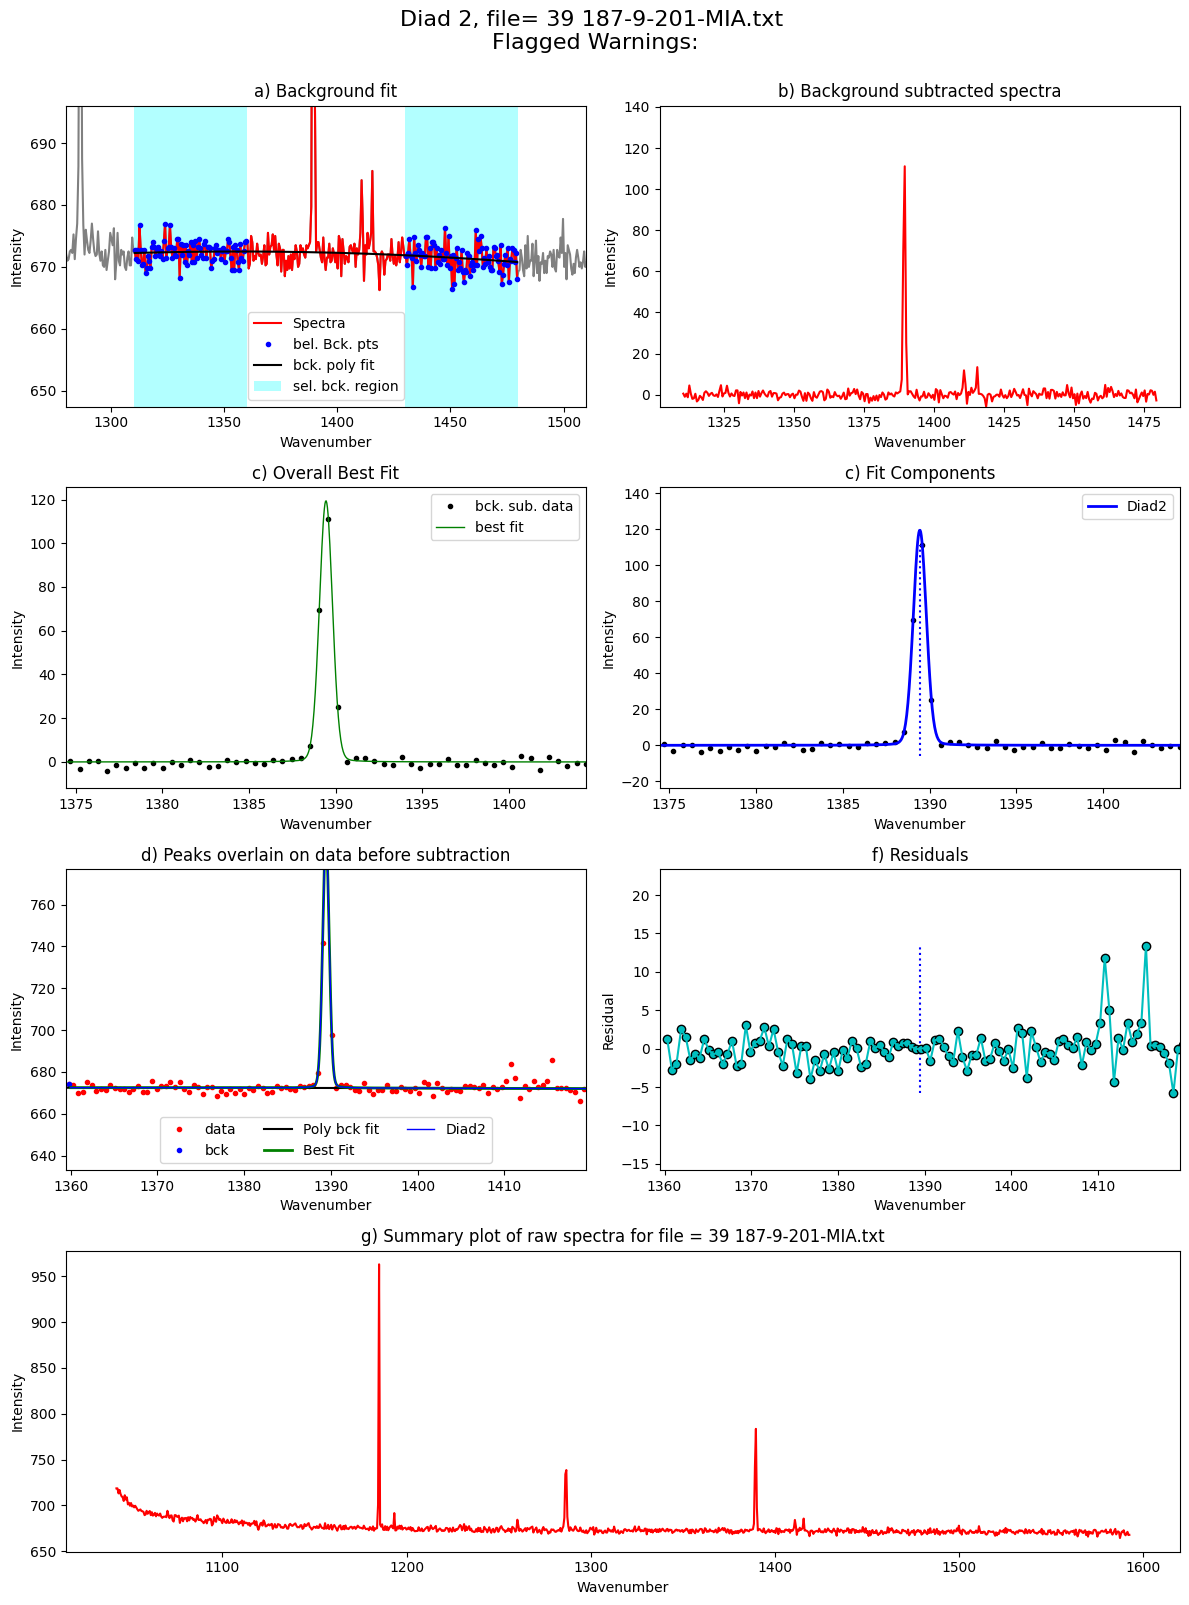

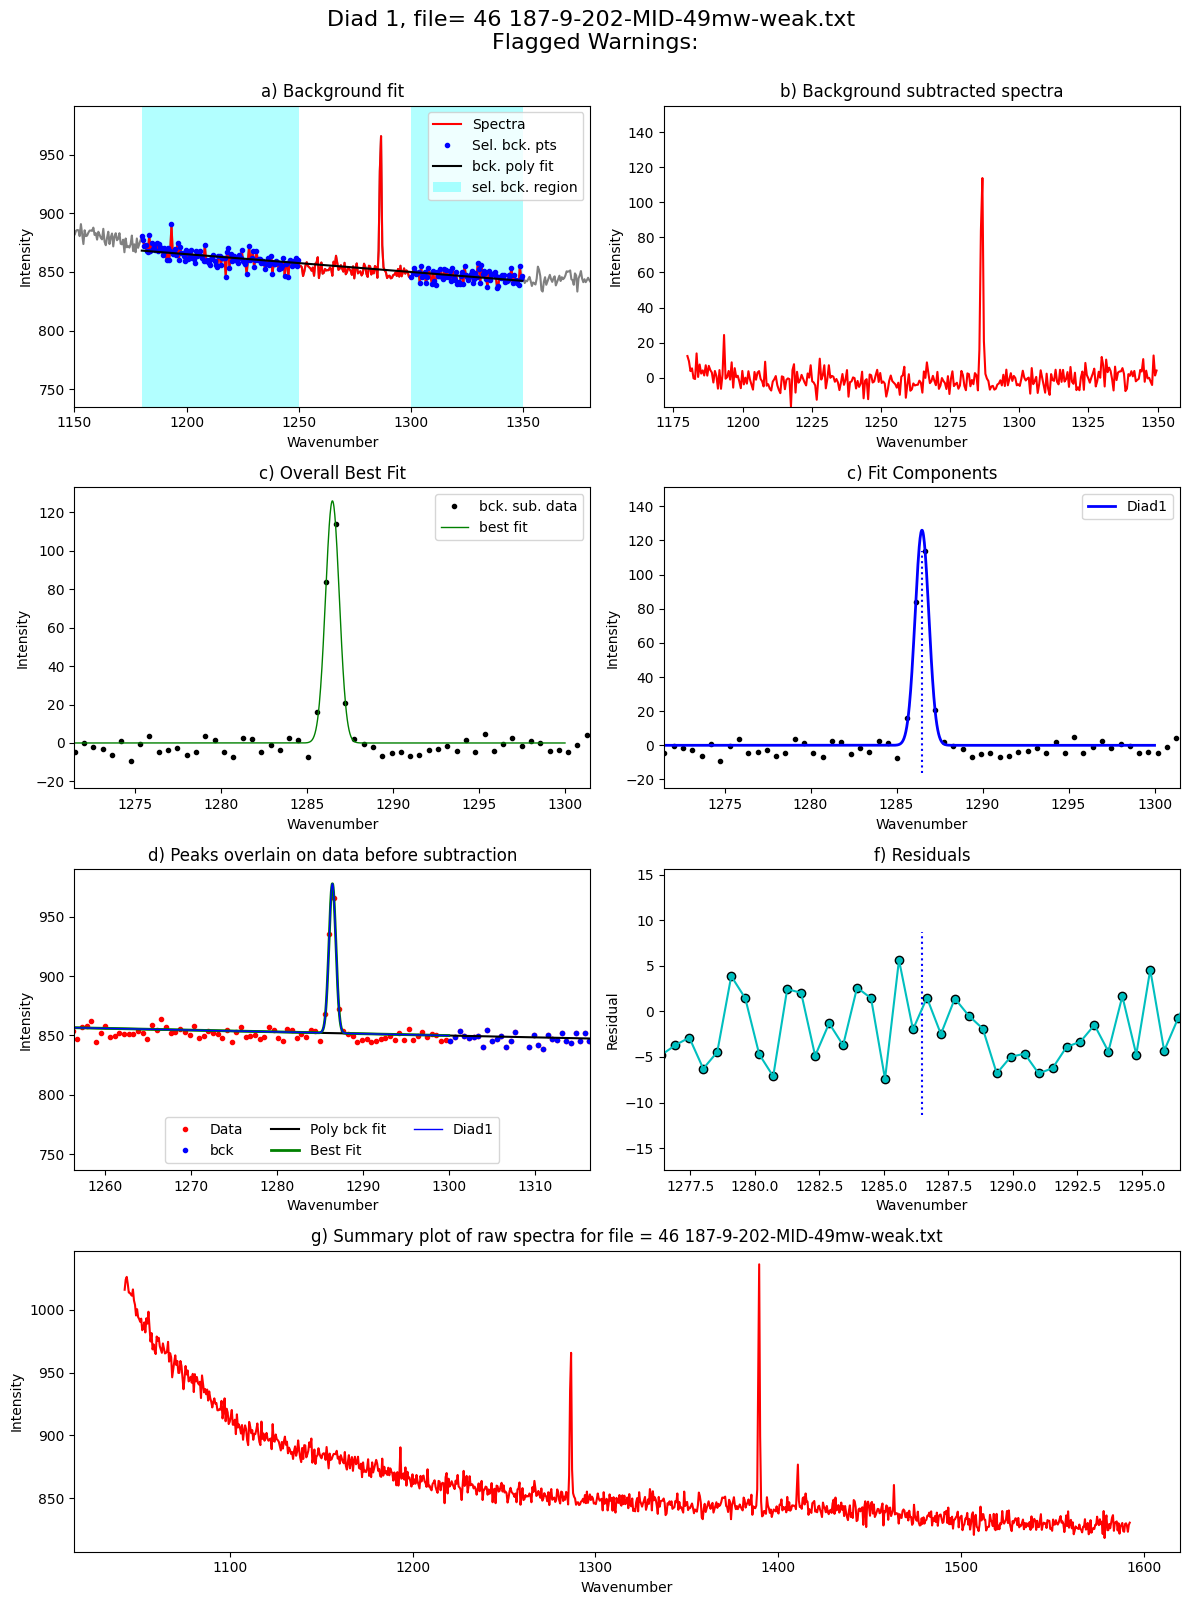

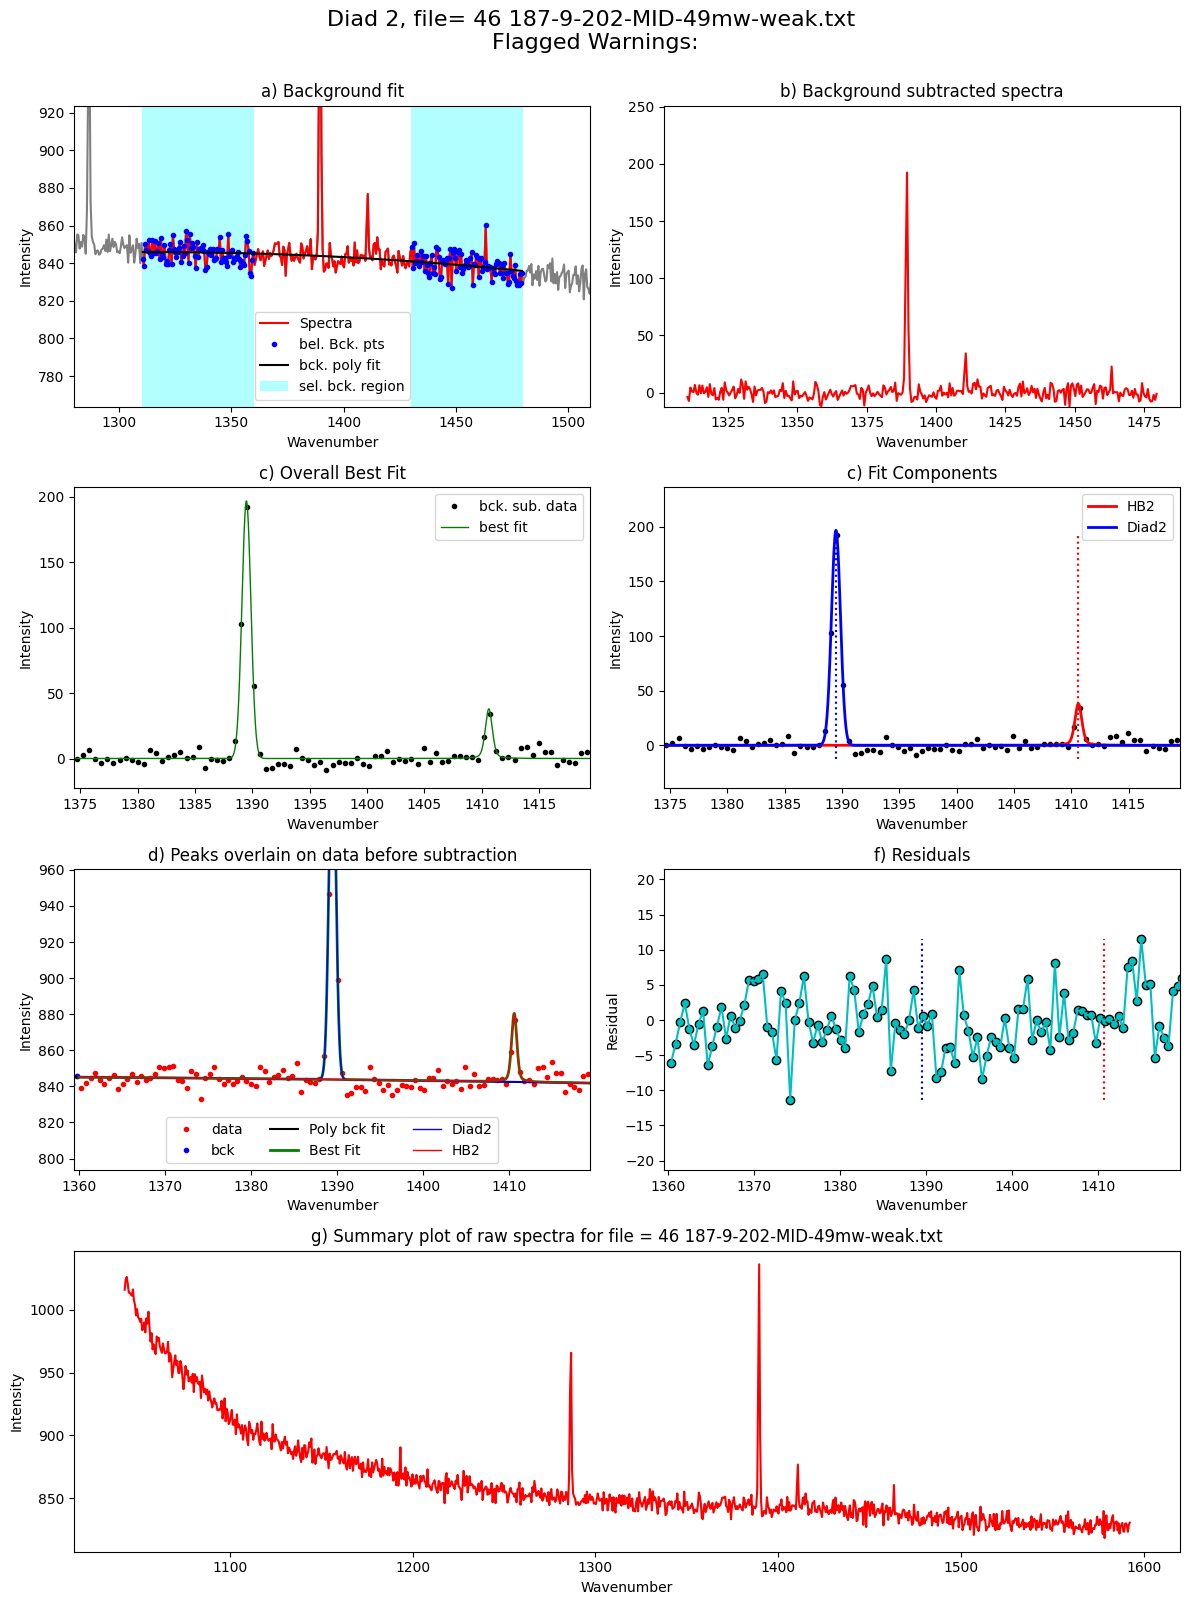

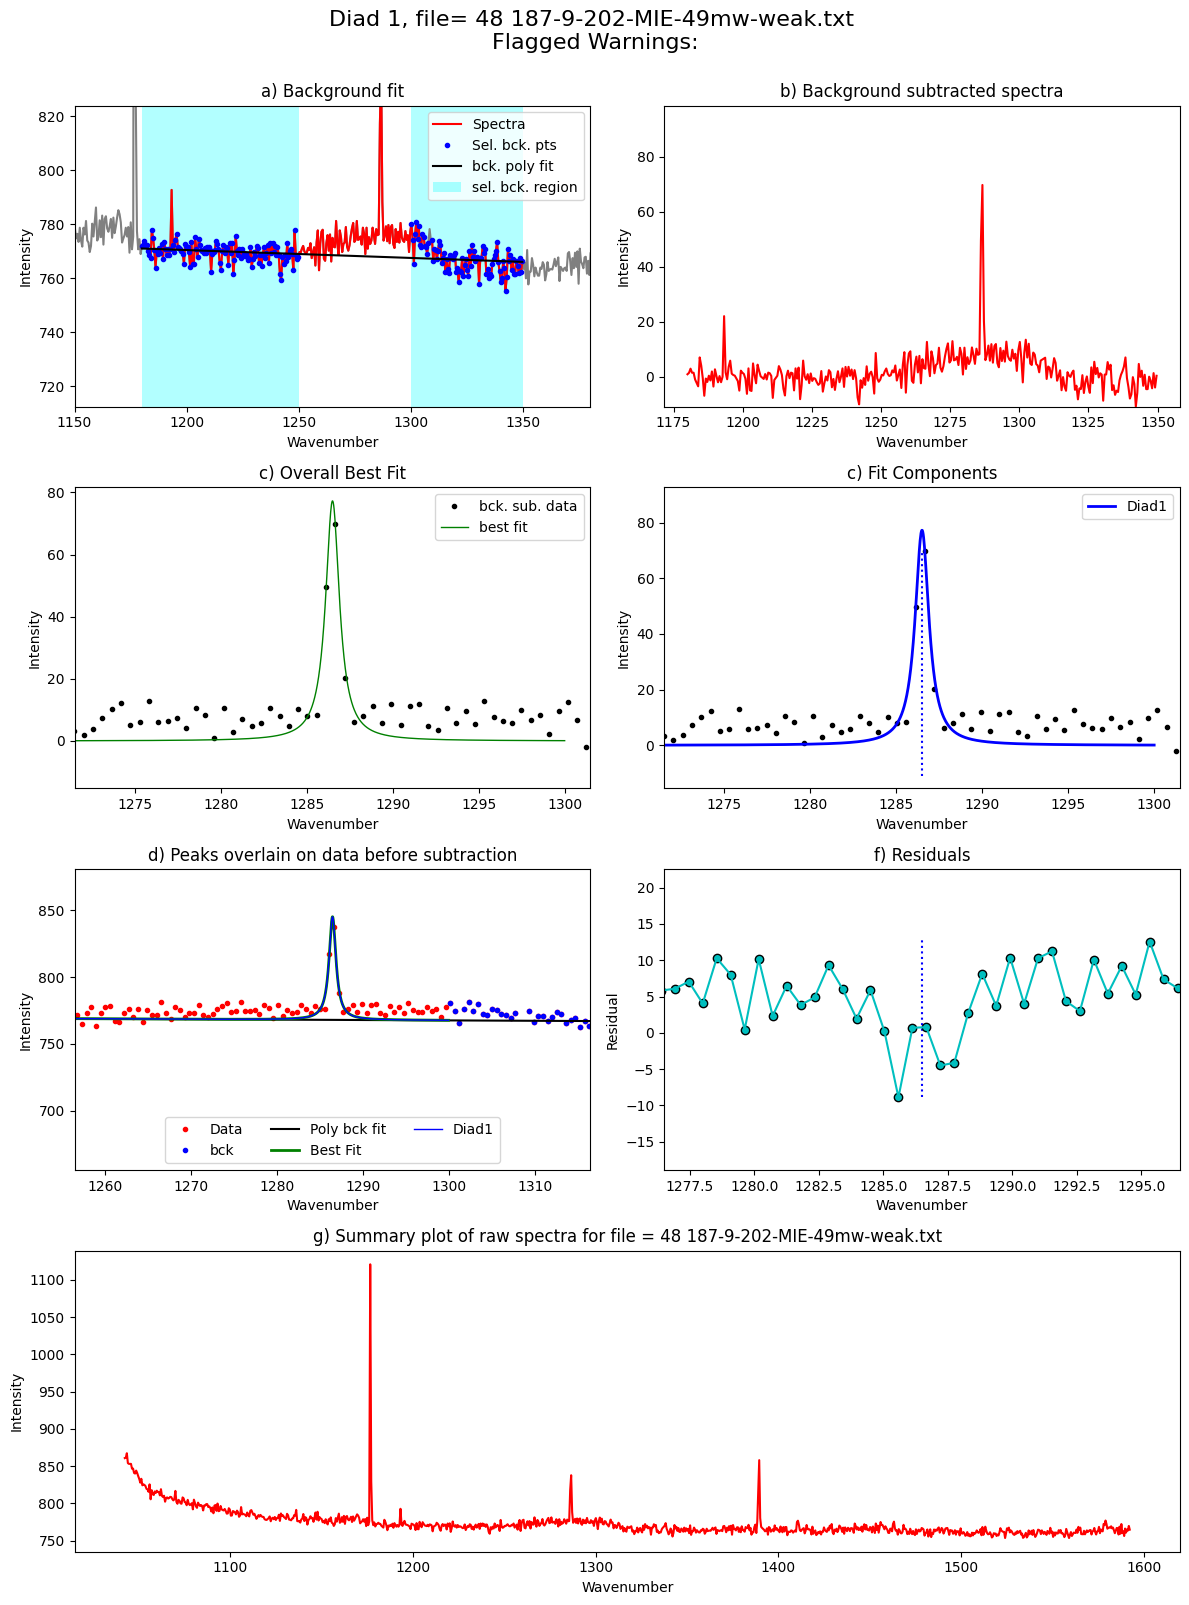

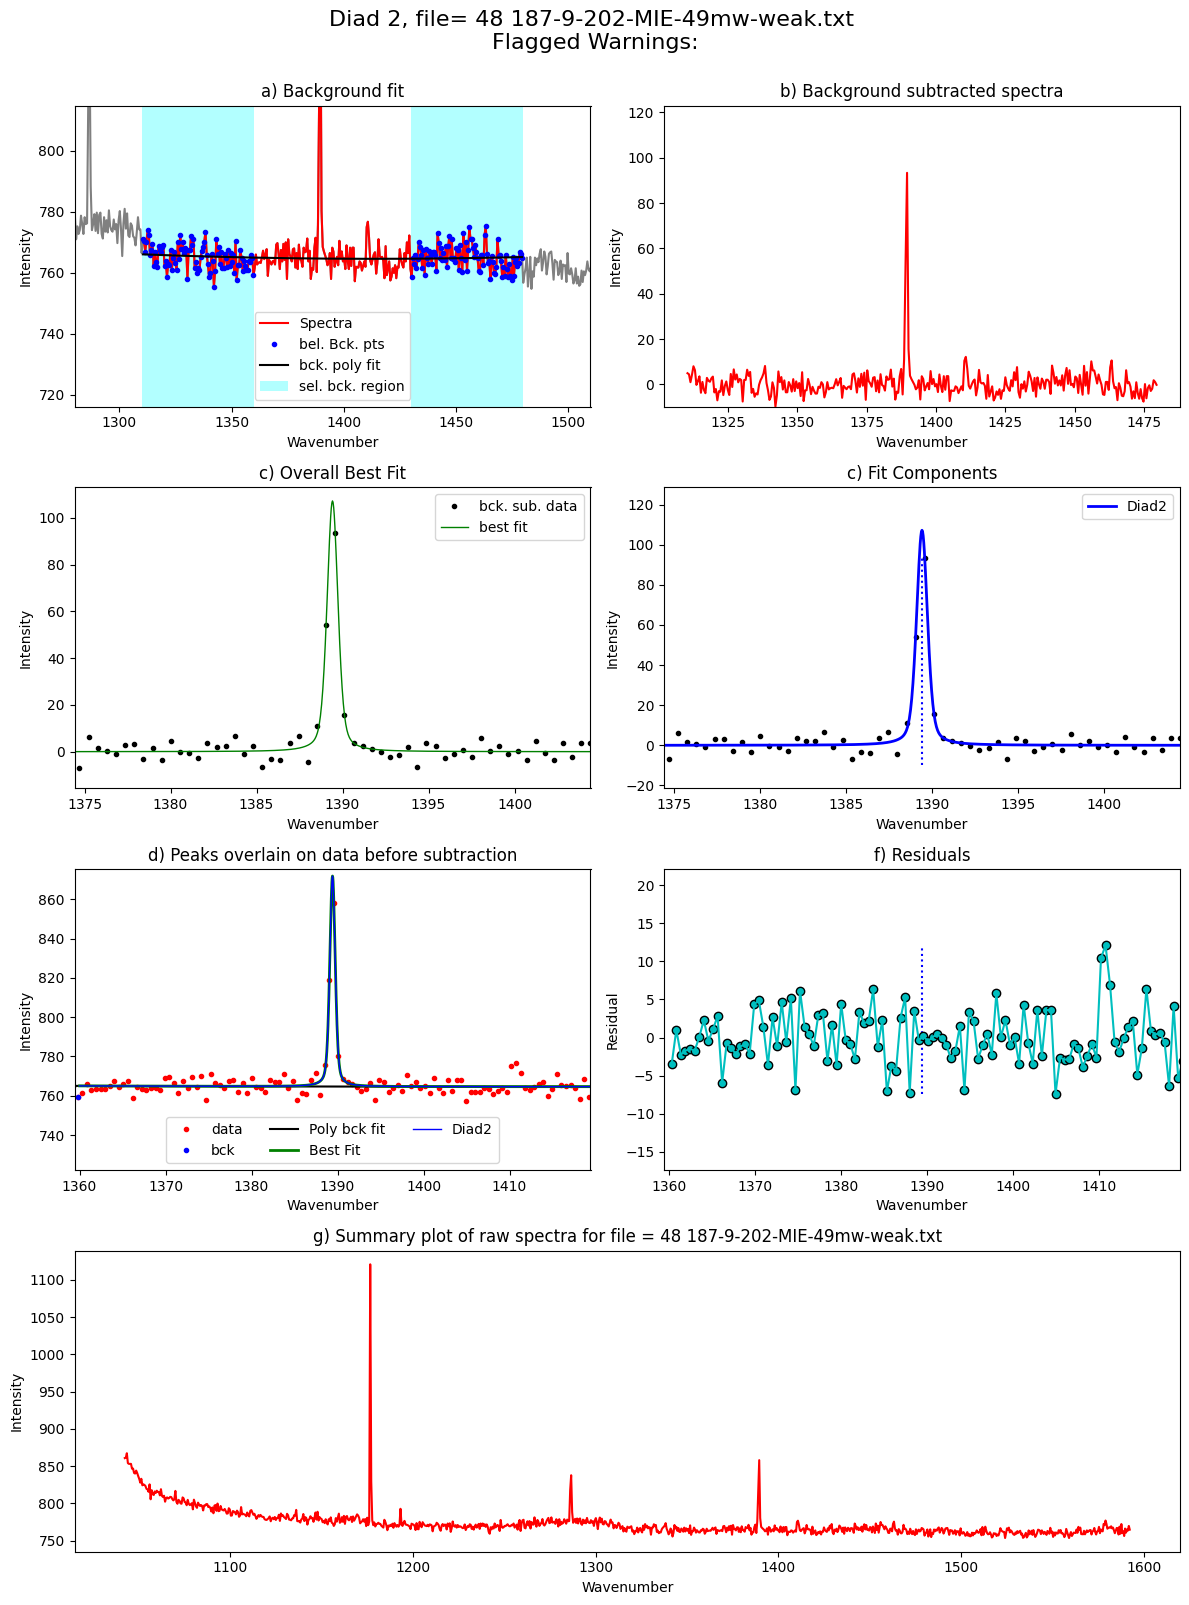

In [47]:
from tqdm import tqdm
plot_figure=True# If False, Means doesnt have to make figures, lot faster. 
close_figure=False # If True, wont show figures in notebook, but will still save them in a folder 
Diad_Files_i=Diad_Files
df_Merge = pd.DataFrame([])
for i in tqdm(range(0, len(Diad_Files))): #
    tqdm.write(f"Processing file: {Diad_Files[i]}")
    
    
    # For diad1, config file like you had in the previous. 
    # Only really used to exclude a range (say your spectra has a known spec)
    diad_id_config=pf.diad_id_config(exclude_range1=[1308, 1309])
    
    # Here, the prominence are taken from the fitting in the last notebook
    diad1_fit_config2.HB_prom=GroupN_df['HB1_abs_prom'].iloc[i]
    diad1_fit_config2.diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i]
    diad1_fit_config2.gauss_amp=2*GroupN_df['HB1_abs_prom'].iloc[i]

    Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config2,
    config2=diad_id_config, path=spectra_path, filename=GroupN_df['filename'].iloc[i],
    filetype=spectra_filetype, plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
    HB_pos=GroupN_df['HB1_pos'].iloc[i])

    ## Same for diad2, just also has a C13 peak
    diad2_fit_config_init.HB_prom=GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config_init.diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i]
    diad2_fit_config_init.gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config_init.C13_prom=GroupN_df['C13_abs_prom'].iloc[i]
    
    
    Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
        config2=diad_id_config,
    path=spectra_path, filename=GroupN_df['filename'].iloc[i], 
    filetype=spectra_filetype,
    plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
    HB_pos=GroupN_df['HB2_pos'].iloc[i], 
    C13_pos=GroupN_df['C13_pos'].iloc[i])
    
    # This combines the outputs into a single dataframe
    data=pf.combine_diad_outputs(filename=GroupN_df['filename'].iloc[i], prefix=prefix, 
    Diad1_fit=Diad1_fit, path=spectra_path,                  
    Diad2_fit=Diad2_fit)        
    
 

    df_Merge = pd.concat([df_Merge, data], axis=0).reset_index(drop=True)


In [48]:
# Save parameters to excel
combo=df_Merge

if batch=='Weak':
    combo.to_excel('Weak_Diads.xlsx', index=False)
if batch=='Medium':
    combo.to_excel('Medium_Diads.xlsx', index=False)
if batch=='Strong':
    combo.to_excel('Strong_Diads.xlsx', index=False)
if batch=='Std':
    combo.to_excel('Std_Diads.xlsx', index=False)

In [49]:
combo

filename   Splitting   Split_σ  \
0             187-1-210-MI1_CRR_DiadFit  103.309828  0.009298   
1                    187-1-210-MI2-rep2  103.650563  0.013245   
2        187-1-211-MI2-46mw_CRR_DiadFit  103.242118  0.024266   
3                    187-1-211-MI2-12mw  103.286143  0.027452   
4                         187-1-211-MI2  103.280355  0.036671   
5                         187-1-211-FI2  103.698010  0.027542   
6             187-1-211-FI3_CRR_DiadFit  103.718006  0.020060   
7             187-1-211-FI1_CRR_DiadFit  103.649168  0.017439   
8   187-1-213-FIC-49mw-weak_CRR_DiadFit  103.001928  0.021609   
9                         187-1-213-FIC  103.062836  0.057410   
10                        187-9-201-MIA  103.015268  0.103368   
11              187-9-202-MID-49mw-weak  103.008389  0.023776   
12              187-9-202-MIE-49mw-weak  102.914569  0.056443   

    Diad1_Combofit_Cent  Diad1_cent_err  Diad1_Combofit_Height  \
0           1285.663611        0.008594             252.373655   
1           1284.908123        0.012272             269.655421   
2           1285.875759        0.021009             355.630578   
3           1285.778306        0.024228             107.501324   
4           1285.777967        0.030643              64.811945   
5           1284.790441        0.025213             180.506586   
6           1284.734728        0.018455             386.627781   
7           1284.916044        0.016307             268.100586   
8           1286.508515        0.018408             103.317118   
9           1286.498616        0.049096              26.282195   
10          1286.420394        0.102969              79.788233   
11          1286.479240        0.020229             126.023080   
12          1286.502410        0.050088              77.267594   

    Diad1_Voigt_Cent  Diad1_Voigt_Area  Diad1_Voigt_Sigma  Diad1_Residual  \
0        1285.663611        422.320344           0.643269        2.887425   
1        1284.908123        637.966719           0.838005        4.186562   
2        1285.875759        503.437937           0.556712        9.671683   
3        1285.778306        173.609746           0.651881        3.548274   
4        1285.777967         94.200868           0.543719        2.667660   
5        1284.790491        424.951899           0.893084        4.841599   
6        1284.734778       1006.271491           0.971628        6.370704   
7        1284.916044        652.474504           0.895408        4.862268   
8        1286.508515        106.777609           0.485451        2.968826   
9        1286.498616         27.754650           0.496035        1.836520   
10       1286.420394         92.524267           0.482242        1.651546   
11       1286.479240        126.134144           0.470133        3.745732   
12       1286.502410        118.541004           0.488339        5.315254   

    ...  Diad1_Asym50  Diad1_Asym70 Diad1_Yuan2017_sym_factor  \
0   ...      1.061497      1.017208                  0.079119   
1   ...      1.239374      1.237129                  0.401192   
2   ...      1.135294      1.136674                  0.150640   
3   ...      1.169761      1.182952                  0.221328   
4   ...      1.011364      1.046667                  0.012357   
5   ...      1.215190      1.005326                  0.384365   
6   ...      1.085610      1.212912                  0.166363   
7   ...      1.227642      1.243077                  0.407665   
8   ...      1.189474      1.185792                  0.183961   
9   ...      1.037618      1.094388                  0.037319   
10  ...      1.025907      1.037037                  0.024987   
11  ...      1.298507      1.338235                  0.280676   
12  ...      1.187500      1.178667                  0.183127   

    Diad1_Remigi2021_BSF  Diad2_Asym50  Diad2_Asym70  \
0               0.005098      1.127869      1.130952   
1               0.006215      1.050000      1.011009   
2               0.003131      1.12631

### This plays a sound when the notebook is done if you have a tendency to procrastinate

In [50]:
# # !pip install winotify

# from winotify import Notification, audio

# toast= Notification(app_id="VSCode",title="Notebook completed",
#                     msg="Step3b_Secondary_Peaks is done!",
#                     duration="short")
# toast.set_audio(audio.Mail,loop=False)
# toast.show()